In [1]:
import os
import sys
from importlib import reload
from pathlib import Path
import ipywidgets as widgets
from IPython.display import display

import dask
import h5py
import matplotlib.pyplot as plt
import numpy as np
import skimage
from dask.diagnostics import ProgressBar
from lmfit import CompositeModel, Model, fit_report
from lmfit.models import (
    ConstantModel,
    DoniachModel,
    GaussianModel,
    LorentzianModel,
    VoigtModel,
)
from scipy.ndimage import gaussian_filter
from skimage import transform




import sed
from sed import SedProcessor

# import spotsize
# from importlib import reload

In [2]:
#%config Completer.use_jedi = False
from datetime import datetime

# import math
#import scipy as sp

%matplotlib inline
from scipy.optimize import curve_fit
import pandas as pd
import xarray as xr


from lmfit import Parameters, CompositeModel, Model
from lmfit.models import ConstantModel
from lmfit.lineshapes import gaussian, voigt, exponential, step

from matplotlib.ticker import MultipleLocator, AutoMinorLocator

def convolve(arr, kernel):
    """Simple convolution of two arrays."""
    npts = min(arr.size, kernel.size)
    pad = np.ones(npts)
    tmp = np.concatenate((pad*arr[0], arr, pad*arr[-1]))
    out = np.convolve(tmp, kernel, mode='valid')
    noff = int((len(out) - npts) / 2)
    return out[noff:noff+npts]

def f1(x,A1,A2,t1,t2,c):
    return (exponential(x,A1,t1)+exponential(x,A2,t2))*step(x,1,c,0)

DDecay = CompositeModel(Model(f1), Model(gaussian), convolve)

#from importlib import reload
#from processor.DldFlashDataframeCreator import DldFlashProcessor

def rescale(array,level1,level2):
    a=np.copy(array)
    M,m=np.nanmax(a), np.nanmin(a)
    s1 =(level2/level1)
    s2 = (1-level2)/(1-level1)
    o = 1-s2
    A=(a-m)/(M-m)*s1
    A[A>level2]=s2/s1*A[A>level2]+o
    return A*(M-m)+m

def t2e(t, toff, eoff, l=0.75):
    c = 0.5 * 1e18 * 9.10938e-31/1.602177e-19
    e = c * (l/(t - toff))**2 - eoff
    return e

def e2t(e, toff, eoff, l=0.75):
    c = 0.5 * 1e18 * 9.10938e-31/1.602177e-19
    t = l * np.sqrt(c/ (e + eoff)) + toff
    return t

def gauss(x,A,m,s,c):
    return A*np.exp(-(x-m)**2/(2*s**2))/np.sqrt(2*np.pi*s**2)+c

def gaussDistribution(x, A, mean, sigma, offset=0):
    return A*0.5*(1+sp.special.erf((x-mean)/(np.sqrt(2*sigma**2))))+offset

def Bin1D(Data,n):
    l=len(Data)
    return sum([Data[i:l-n+1+i:n]for i in range(n)])

In [3]:
config = "Scholz_Wind_update.yaml"

In [4]:
# Specify the folder name
folder_name = "Lineshape"
#Run = "50131"

# Check if the folder already exists
if not os.path.exists(folder_name):
    # Create the folder
    os.makedirs(folder_name)
    print(f"Folder '{folder_name}' created successfully.")
else:
    print(f"Folder '{folder_name}' already exists.")

Folder 'Lineshape' already exists.


## NEW CODE 

In [5]:
run_numbers = [50131, 50135, 50132, 50134, 50133]


Processing se_50131
Configuration loaded from: [/home/noufalme/DataAnalysis/Scholz_Wind_update.yaml]
Default config loaded from: [/home/noufalme/DataAnalysis/sed/sed/.sed-venv/lib/python3.9/site-packages/sed/config/default.yaml]
Reading files: 21 new files of 21 total.


[Parallel(n_jobs=21)]: Using backend LokyBackend with 21 concurrent workers.
[Parallel(n_jobs=21)]: Done   4 out of  21 | elapsed:   24.1s remaining:  1.7min
[Parallel(n_jobs=21)]: Done   7 out of  21 | elapsed:   24.7s remaining:   49.5s
[Parallel(n_jobs=21)]: Done  10 out of  21 | elapsed:   25.5s remaining:   28.1s
[Parallel(n_jobs=21)]: Done  13 out of  21 | elapsed:   25.7s remaining:   15.8s
[Parallel(n_jobs=21)]: Done  16 out of  21 | elapsed:   26.0s remaining:    8.1s
[Parallel(n_jobs=21)]: Done  19 out of  21 | elapsed:   28.9s remaining:    3.0s
[Parallel(n_jobs=21)]: Done  21 out of  21 | elapsed:   30.8s finished


All files converted successfully!
Filling nan values...
Combined parquet file saved.
loading complete in  37.67 s
Adding energy column to dataframe:


  0%|          | 0/1 [00:00<?, ?it/s]

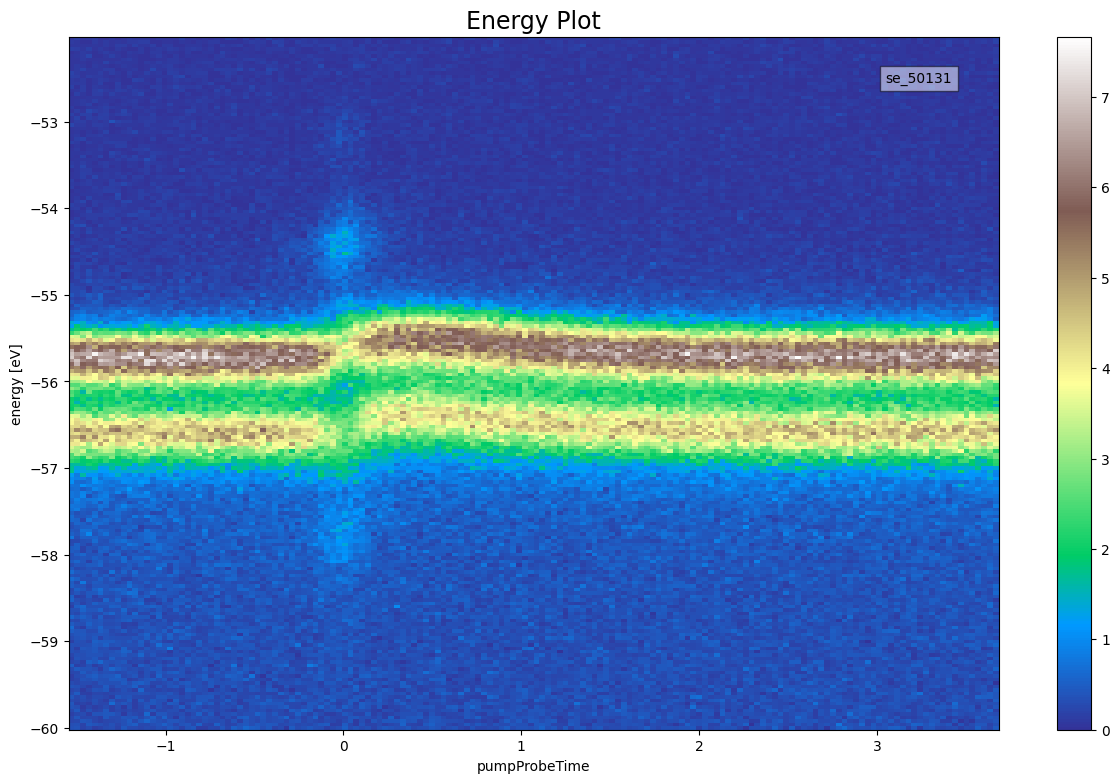

Processing se_50135
Configuration loaded from: [/home/noufalme/DataAnalysis/Scholz_Wind_update.yaml]
Default config loaded from: [/home/noufalme/DataAnalysis/sed/sed/.sed-venv/lib/python3.9/site-packages/sed/config/default.yaml]
Reading files: 10 new files of 10 total.


[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done   3 out of  10 | elapsed:   40.6s remaining:  1.6min
[Parallel(n_jobs=10)]: Done   5 out of  10 | elapsed:   41.1s remaining:   41.1s
[Parallel(n_jobs=10)]: Done   7 out of  10 | elapsed:   43.9s remaining:   18.8s
[Parallel(n_jobs=10)]: Done  10 out of  10 | elapsed:   47.0s finished


All files converted successfully!
Filling nan values...
Combined parquet file saved.
loading complete in  51.32 s
Adding energy column to dataframe:


  0%|          | 0/1 [00:00<?, ?it/s]

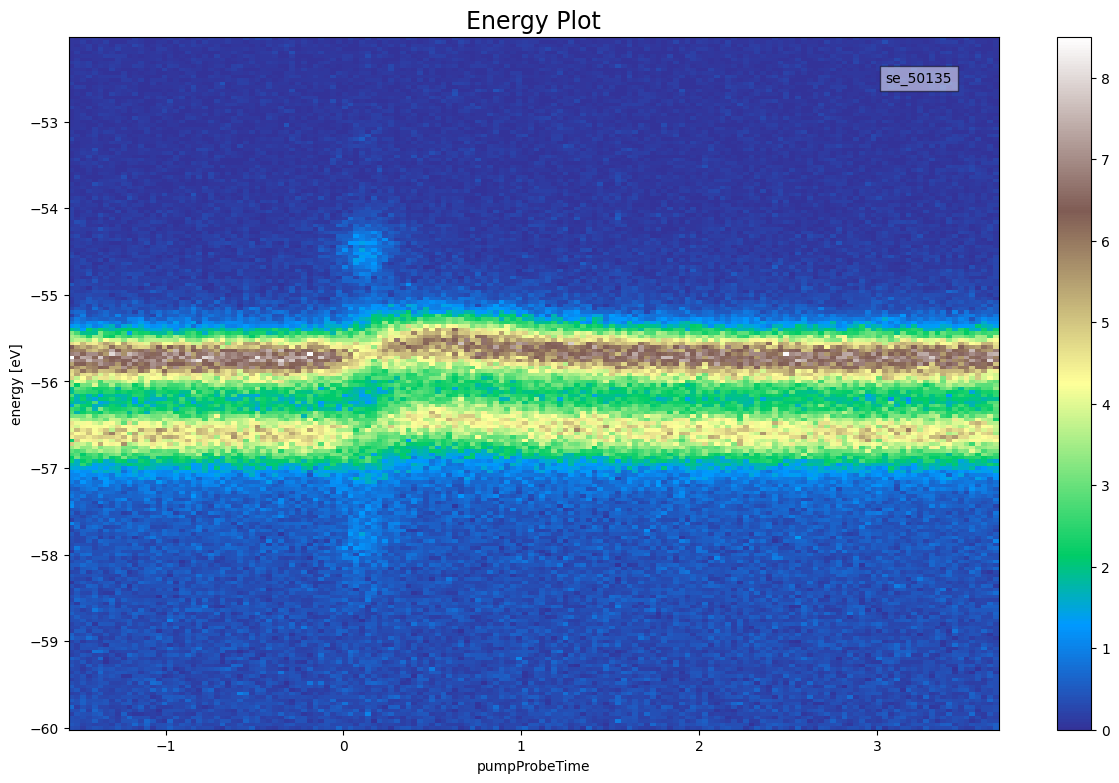

Processing se_50132
Configuration loaded from: [/home/noufalme/DataAnalysis/Scholz_Wind_update.yaml]
Default config loaded from: [/home/noufalme/DataAnalysis/sed/sed/.sed-venv/lib/python3.9/site-packages/sed/config/default.yaml]
Reading files: 11 new files of 11 total.


[Parallel(n_jobs=11)]: Using backend LokyBackend with 11 concurrent workers.
[Parallel(n_jobs=11)]: Done   2 out of  11 | elapsed:   40.2s remaining:  3.0min
[Parallel(n_jobs=11)]: Done   4 out of  11 | elapsed:   40.3s remaining:  1.2min
[Parallel(n_jobs=11)]: Done   6 out of  11 | elapsed:   41.6s remaining:   34.7s
[Parallel(n_jobs=11)]: Done   8 out of  11 | elapsed:   44.3s remaining:   16.6s
[Parallel(n_jobs=11)]: Done  11 out of  11 | elapsed:   45.4s finished


All files converted successfully!
Filling nan values...
Combined parquet file saved.
loading complete in  48.86 s
Adding energy column to dataframe:


  0%|          | 0/1 [00:00<?, ?it/s]

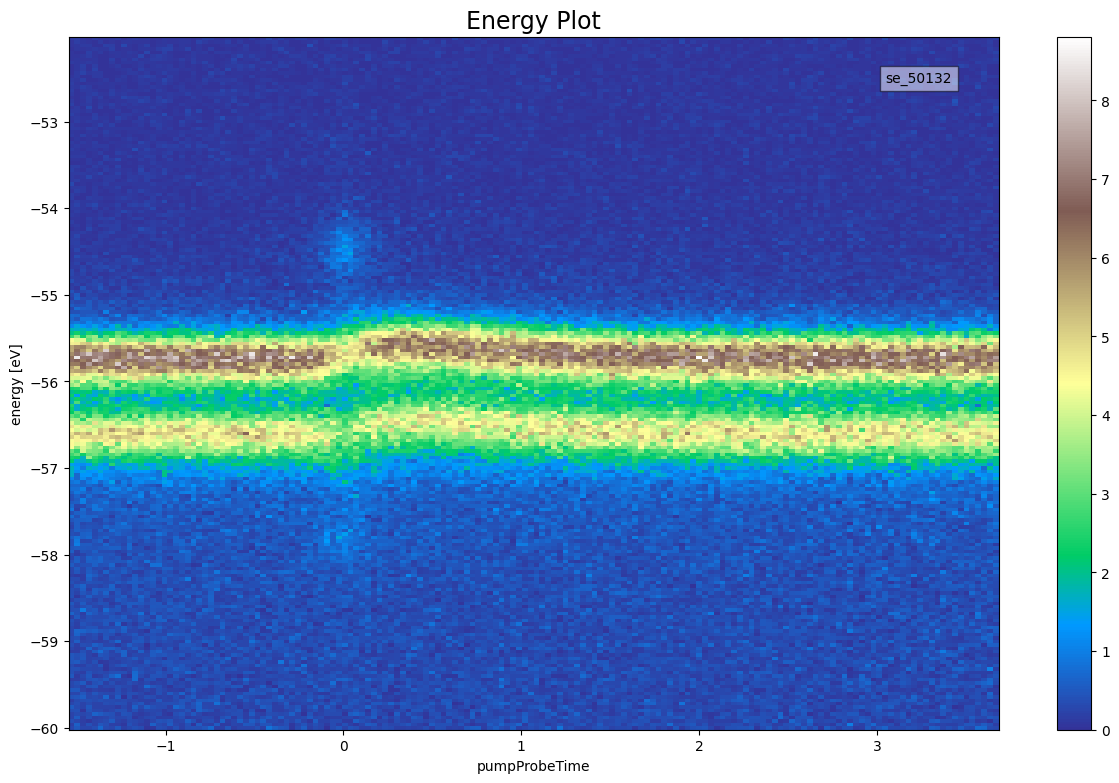

Processing se_50134
Configuration loaded from: [/home/noufalme/DataAnalysis/Scholz_Wind_update.yaml]
Default config loaded from: [/home/noufalme/DataAnalysis/sed/sed/.sed-venv/lib/python3.9/site-packages/sed/config/default.yaml]
Reading files: 10 new files of 10 total.


[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done   3 out of  10 | elapsed:   40.1s remaining:  1.6min
[Parallel(n_jobs=10)]: Done   5 out of  10 | elapsed:   40.9s remaining:   40.9s
[Parallel(n_jobs=10)]: Done   7 out of  10 | elapsed:   41.8s remaining:   17.9s
[Parallel(n_jobs=10)]: Done  10 out of  10 | elapsed:   46.5s finished


All files converted successfully!
Filling nan values...
Combined parquet file saved.
loading complete in  49.88 s
Adding energy column to dataframe:


  0%|          | 0/1 [00:00<?, ?it/s]

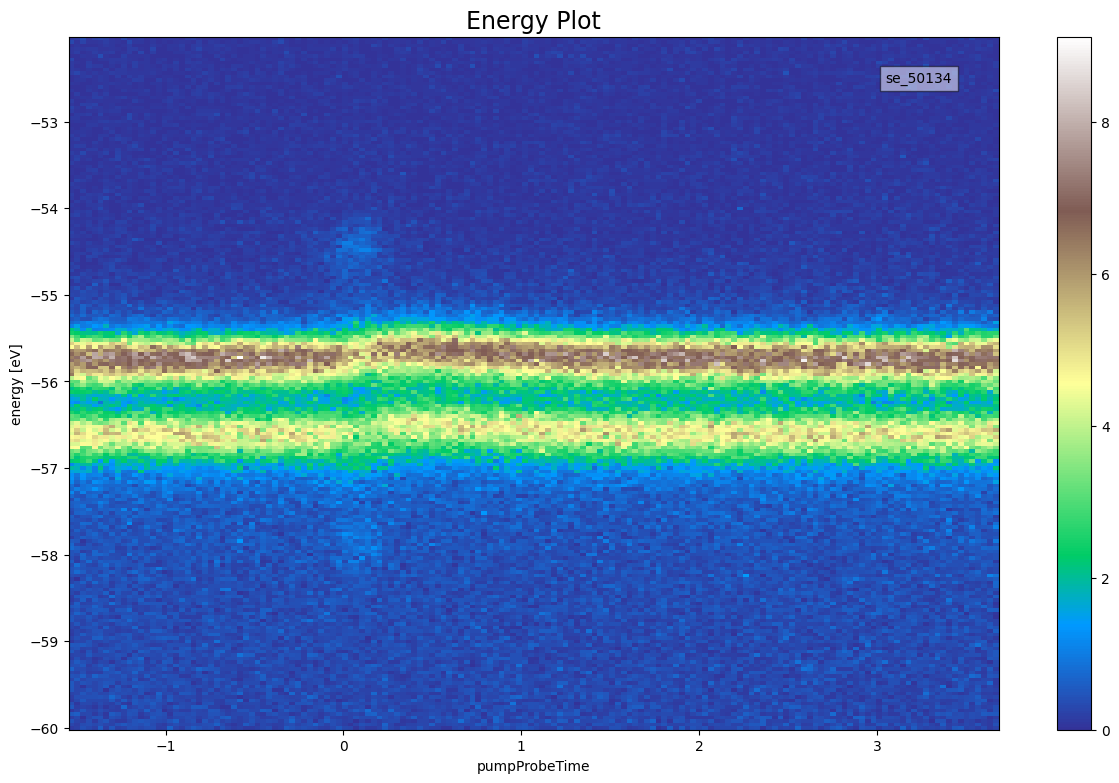

Processing se_50133
Configuration loaded from: [/home/noufalme/DataAnalysis/Scholz_Wind_update.yaml]
Default config loaded from: [/home/noufalme/DataAnalysis/sed/sed/.sed-venv/lib/python3.9/site-packages/sed/config/default.yaml]
Reading files: 9 new files of 9 total.


[Parallel(n_jobs=9)]: Using backend LokyBackend with 9 concurrent workers.
[Parallel(n_jobs=9)]: Done   2 out of   9 | elapsed:   38.5s remaining:  2.2min
[Parallel(n_jobs=9)]: Done   3 out of   9 | elapsed:   38.8s remaining:  1.3min
[Parallel(n_jobs=9)]: Done   4 out of   9 | elapsed:   39.9s remaining:   49.9s
[Parallel(n_jobs=9)]: Done   5 out of   9 | elapsed:   40.9s remaining:   32.8s
[Parallel(n_jobs=9)]: Done   6 out of   9 | elapsed:   41.5s remaining:   20.8s
[Parallel(n_jobs=9)]: Done   7 out of   9 | elapsed:   42.4s remaining:   12.1s
[Parallel(n_jobs=9)]: Done   9 out of   9 | elapsed:   44.9s finished


All files converted successfully!
Filling nan values...
Combined parquet file saved.
loading complete in  48.09 s
Adding energy column to dataframe:


  0%|          | 0/1 [00:00<?, ?it/s]

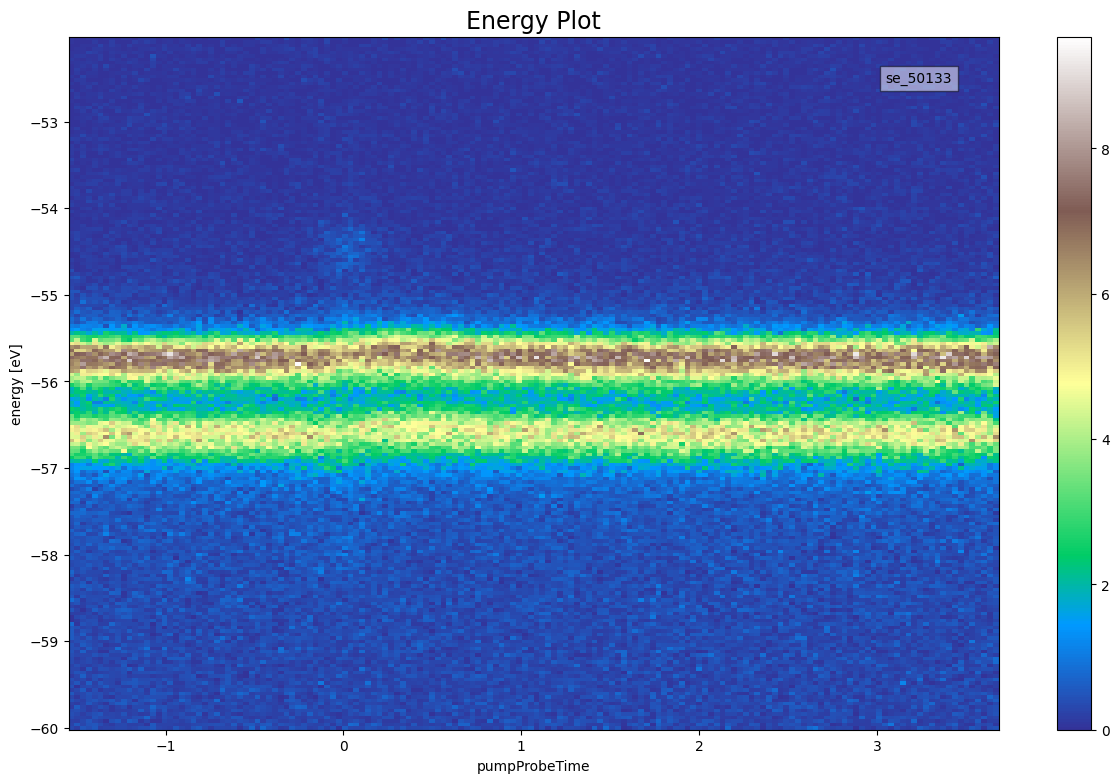

In [6]:

senorm_results = {}  # Dictionary to store senorm for each run
seb_results = {}     # Dictionary to store seb for each run

def process_and_plot_runs(run_numbers):
    """
    Iterates over the given run numbers, processes each run with the specified steps, and generates plots.
    
    Parameters:
    run_numbers (list): List of run numbers to process.
    """
    for run_number in run_numbers:
        # Define the name for the current run
        run_name = f"se_{run_number}"
        print(f"Processing {run_name}")
        
        # Initialize the SedProcessor with the current run number
        exec(
            f"{run_name} = SedProcessor("
            f"runs=[{run_number}], "
            "config=config, "
            "collect_metadata=True, "
            "save_parquet=True, "
            "force_recreate=True)"
        )
        
        # Access the dynamically created variable
        se = locals()[run_name]
        
        # Processing steps
        se.add_jitter()
        se.append_energy_axis()

        se._dataframe["energy"] += 229

        t0 = 3.53952100e+03
        se._dataframe["pumpProbeTime"] = t0 - se._dataframe["delayStage"]

        ranges = [[-60, -52],  [-1.53, 3.7]]
        bins = [200, 160]

        axes = ["energy", "pumpProbeTime"]
        seb = se.compute(axes=axes, ranges=ranges, bins=bins)  # Compute seb

        # Store seb in the dictionary with run_name as the key
        seb_results[run_name] = seb
        
        senorm = seb / seb.mean("energy")

        # Store senorm in the dictionary with run_name as the key
        senorm_results[run_name] = senorm
        
        # Plotting
        plt.figure(figsize=(15, 9))
        senorm.plot(cmap="terrain")

        # Add a box with the name in the top right corner
        plt.text(
            0.95,
            0.95,
            run_name,
            fontsize=10,
            bbox=dict(facecolor="white", alpha=0.5),
            horizontalalignment="right",
            verticalalignment="top",
            transform=plt.gca().transAxes,
        )

        # Add a title to the plot
        plt.title("Energy Plot", fontsize=17)

        # Uncomment the following lines to save the plot in the folder
        # plot_path = os.path.join(folder_name, "{}_Eng_Delaystage.png".format(run_name))
        # plt.savefig(plot_path, dpi=200)

        plt.show()

# Example usage:
process_and_plot_runs(run_numbers)


## Fit function without Sidebands

In [7]:
font={'fontsize':12}

# Fit function including sidebands

It is necessary to include the sidebands into the fit function, otherwise the fit will deliver a very broad and missplaced result at t0. 

Fitting data for run number: 50131


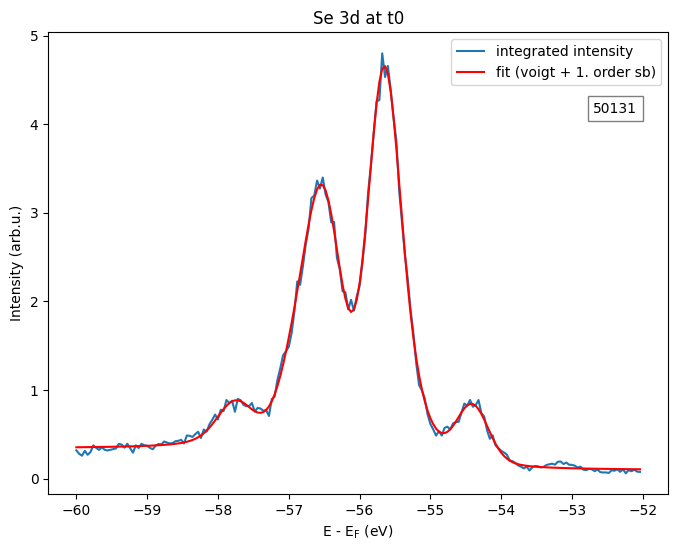

Fitting data for run number: 50135


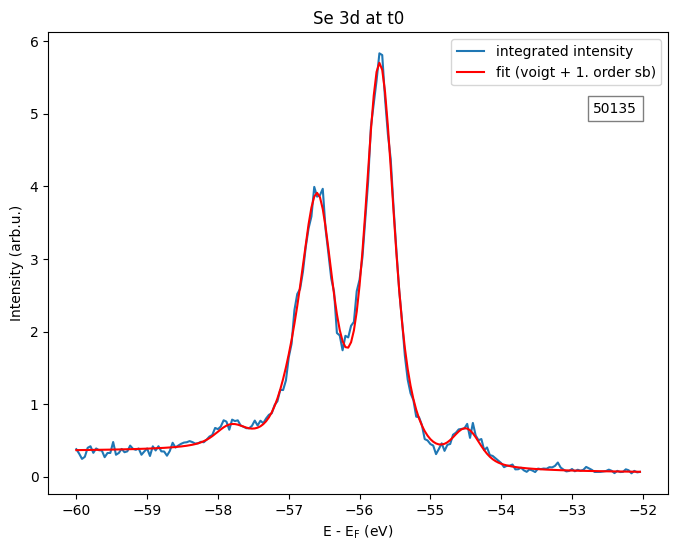

Fitting data for run number: 50132


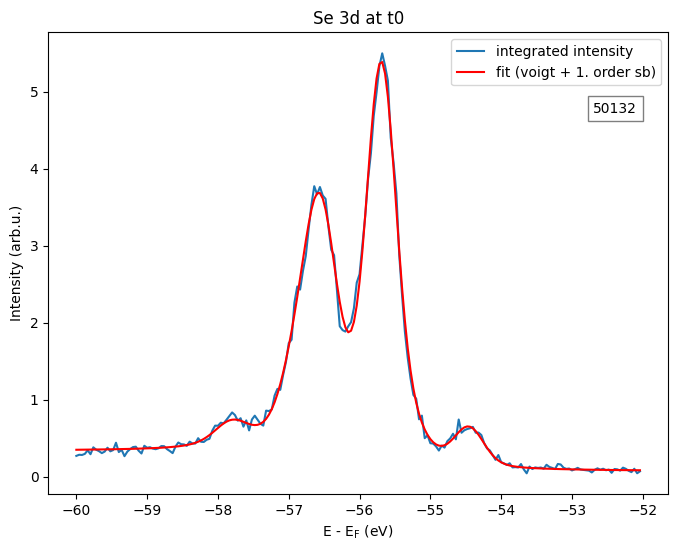

Fitting data for run number: 50134


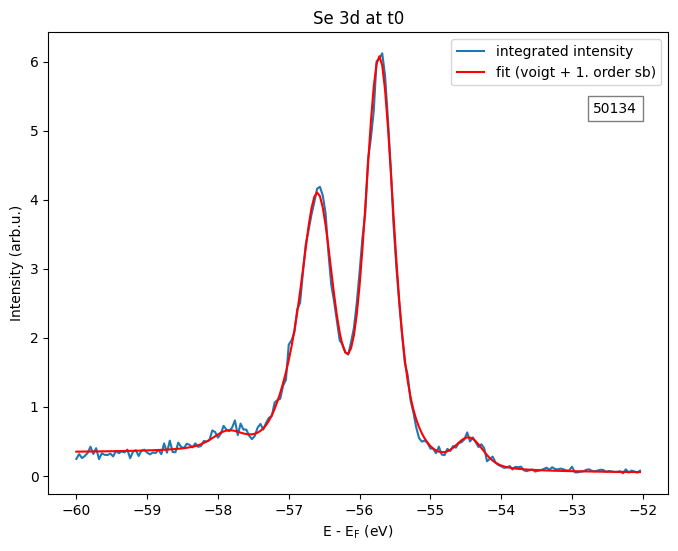

Fitting data for run number: 50133


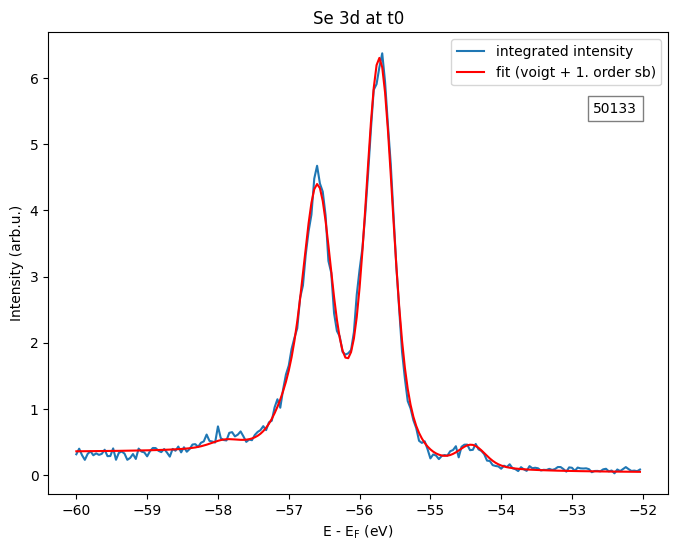

In [8]:
import os
import matplotlib.pyplot as plt
import xarray as xr
from lmfit import Model, Parameters
from scipy.ndimage import gaussian_filter
from scipy.special import wofz
import numpy as np

# Define the background function
def background(signal, A, off, **kwargs):
    model = -np.cumsum(signal)
    model -= model.min()
    return model * A + off

# Define the model function with Voigt profiles and background
def Lines(x, amp_1, amp_2, cen_1, cen_2, sig_1, sig_2, gam_1, gam_2, A, off, amp_1p, amp_2p, amp_1m, amp_2m, de, **kwargs):
    model = voigt_profile(x, amp_1, cen_1, sig_1, gam_1) + voigt_profile(x, amp_2, cen_2, sig_2, gam_2)
    sbp = voigt_profile(x, amp_1 * amp_1p, cen_1 + de, sig_1, gam_1) + voigt_profile(x, amp_2 * amp_2p, cen_2 + de, sig_2, gam_2)
    sbm = voigt_profile(x, amp_1 * amp_1m, cen_1 - de, sig_1, gam_1) + voigt_profile(x, amp_2 * amp_2m, cen_2 - de, sig_2, gam_2)
    model = model + sbp + sbm
    bg = background(model, A, off)
    return model + bg

# Define Voigt profile function
def voigt_profile(x, amplitude, center, sigma, gamma):
    z = ((x - center) + 1j * gamma) / (sigma * (2**0.5))
    return amplitude * wofz(z).real / (sigma * (2*np.pi)**0.5)

def lineshape(run_number):
    # Ensure the correct dataset is selected
    data = xr.apply_ufunc(gaussian_filter, senorm_results[f"se_{run_number}"], (0, 0))
    
    mod = Model(Lines)
    pfit = Parameters()
    pfit.add(name='amp_1', value=3.274, min=0)
    pfit.add(name='amp_2', value=2.899, min=0)
    pfit.add(name='cen_1', value=-55.64)
    pfit.add(name='cen_2', value=-56.5)
    pfit.add(name='sig_1', value=0.205, min=0)
    pfit.add(name='sig_2', expr='sig_1')
    pfit.add(name='gam_1', value=0.09, min=0)
    pfit.add(name='gam_2', value=0.05, min=0, max=0.4)
    pfit.add(name='off', value=0.1)
    pfit.add(name='A', value=0.00158053)
    pfit.add(name='amp_1p', value=0.004, min=0)
    pfit.add(name='amp_2p', value=0.023, min=0)
    pfit.add(name='amp_1m', expr='amp_1p')
    pfit.add(name='amp_2m', expr='amp_2p')
    pfit.add(name='de', value=1.2)
    
    line = data.sel(energy=slice(-60, -52), pumpProbeTime=slice(-0.2, 0.2)).mean('pumpProbeTime')
    y = line
    x = y.energy.values
    
    print("Fitting data for run number:", run_number)
    result = mod.fit(line, params=pfit, x=x)
    Params1 = result.params
    
    plt.figure(figsize=(8, 6))
    y.plot(label='integrated intensity')
    plt.plot(x, result.best_fit, 'r-', label='fit (voigt + 1. order sb)')
    plt.legend(loc=1)
    plt.title("Se 3d at t0")
    plt.xlabel('E - $ \mathrm{E}_\mathrm{F}$ (eV)')
    plt.ylabel('Intensity (arb.u.)')

    # Add a box with the name in the top right corner
    plt.text(
            0.95,
            0.85,
            run_number,
            fontsize=10,
            bbox=dict(facecolor="white", alpha=0.5),
            horizontalalignment="right",
            verticalalignment="top",
            transform=plt.gca().transAxes,
        )
    
    plot_path = os.path.join(folder_name, f"{run_number}_Se3d_Model.png")
    plt.savefig(plot_path, dpi=200)
    plt.show()
    
    guess = Parameters()
    vary = ['amp_1', 'amp_2', 'cen_1', 'cen_2', 'gam_1', 'gam_2', 'amp_1p', 'amp_2p']
    Expr = ['amp_1m', 'amp_2m']
    
    for item in Params1:
        if item in Expr:
            guess.add(item, Params1[item].value, expr=Params1[item].expr)
        else:
            guess.add(item, Params1[item].value, min=Params1[item].min, max=Params1[item].max, vary=item in vary)
    
    Fit1 = []
    for line in xr.apply_ufunc(gaussian_filter, senorm_results[f"se_{run_number}"].sel(energy=slice(-59, -52)), (0.0, 0.0)).T:
        x = line.energy.values
        result = mod.fit(line, params=guess, x=x)
        Params = result.params
        Fit1.append(Params)
    
    return Fit1



for run_number in run_numbers:
    fits = lineshape(run_number)
    #for fit in fits:
        #print("Fit parameters for run", run_number)
        #print(fit)


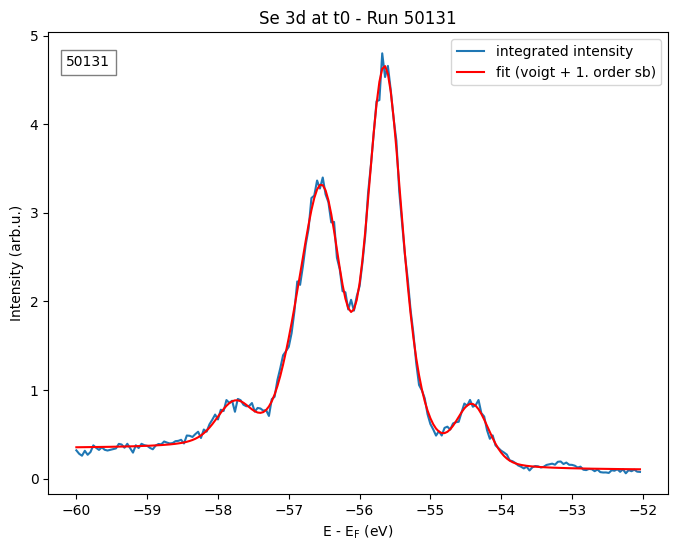

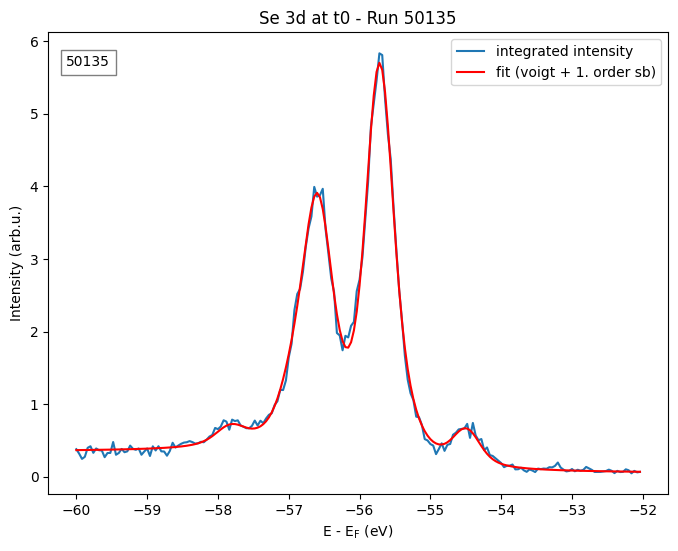

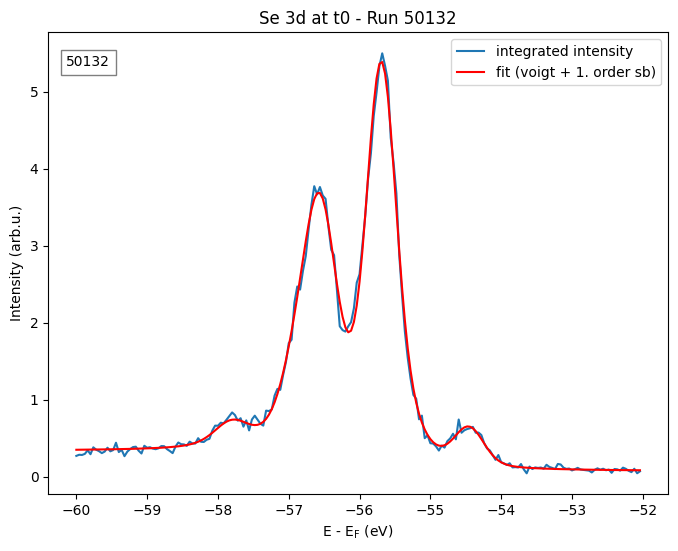

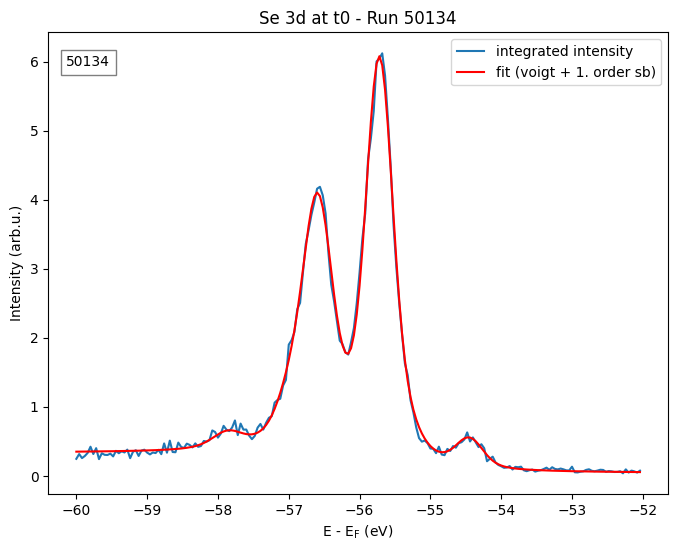

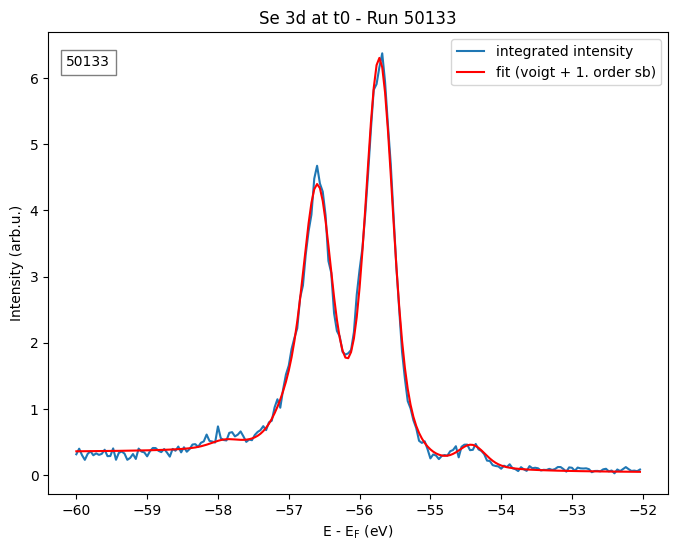

Parameters DataFrame:
           Run_50131  Run_50135  Run_50132  Run_50134  Run_50133
Parameter                                                       
amp_1       2.646842   3.259007   2.943352   3.313766   3.503721
amp_2       2.144582   2.355908   2.485558   2.532107   2.576441
cen_1     -55.652770 -55.716038 -55.693536 -55.719562 -55.719321
cen_2     -56.514499 -56.594037 -56.563926 -56.593720 -56.596208
sig_1       0.203015   0.137891   0.181645   0.152821   0.152354
sig_2       0.203015   0.137891   0.181645   0.152821   0.152354
gam_1       0.060530   0.119623   0.065869   0.089894   0.092169
gam_2       0.123122   0.156014   0.143898   0.138820   0.121921
off         0.095582   0.051378   0.073989   0.041738   0.037140
A           0.001570   0.001840   0.001644   0.001797   0.001900
amp_1p      0.158310   0.090341   0.098105   0.071834   0.054372
amp_2p      0.169277   0.078494   0.097240   0.063064   0.027974
amp_1m      0.158310   0.090341   0.098105   0.071834   0.054372
amp

In [9]:
import numpy as np
import xarray as xr
from lmfit import Model, Parameters
from scipy.ndimage import gaussian_filter
import matplotlib.pyplot as plt
import pandas as pd
import os

# Define functions
def background(signal, A, off, **kwargs):
    model = -np.cumsum(signal)
    model -= model.min()
    return model * A + off

def voigt(x, amp, cen, sig, gam):
    return amp * np.real(wofz((x - cen + 1j * gam) / (sig * np.sqrt(2)))) / (sig * np.sqrt(2 * np.pi))

def Lines(x, amp_1, amp_2, cen_1, cen_2, sig_1, sig_2, gam_1, gam_2, A, off, amp_1p, amp_2p, amp_1m, amp_2m, de, **kwargs):
    model = voigt(x, amp_1, cen_1, sig_1, gam_1) + voigt(x, amp_2, cen_2, sig_2, gam_2)
    sbp = voigt(x, amp_1 * amp_1p, cen_1 + de, sig_1, gam_1) + voigt(x, amp_2 * amp_2p, cen_2 + de, sig_2, gam_2)
    sbm = voigt(x, amp_1 * amp_1m, cen_1 - de, sig_1, gam_1) + voigt(x, amp_2 * amp_2m, cen_2 - de, sig_2, gam_2)
    model = model + sbp + sbm
    bg = background(model, A, off)
    return model + bg


# Initialize an empty DataFrame to store parameters
df_params = pd.DataFrame()

# Process each run number
for run_number in run_numbers:
    data = xr.apply_ufunc(gaussian_filter, senorm_results[f"se_{run_number}"], (0, 0))

    mod = Model(Lines)
    pfit = Parameters()
    pfit.add(name='amp_1', value=3.274, min=0)
    pfit.add(name='amp_2', value=2.899, min=0)
    pfit.add(name='cen_1', value=-55.64)
    pfit.add(name='cen_2', value=-56.5)
    pfit.add(name='sig_1', value=0.205, min=0)
    pfit.add(name='sig_2', expr='sig_1')
    pfit.add(name='gam_1', value=0.09, min=0)
    pfit.add(name='gam_2', value=0.05, min=0, max=0.4)
    pfit.add(name='off', value=0.1)
    pfit.add(name='A', value=0.00158053)
    pfit.add(name='amp_1p', value=0.004, min=0)
    pfit.add(name='amp_2p', value=0.023, min=0)
    pfit.add(name='amp_1m', expr='amp_1p')
    pfit.add(name='amp_2m', expr='amp_2p')
    pfit.add(name='de', value=1.2)

    line = data.sel(energy=slice(-60, -52), pumpProbeTime=slice(-0.2, 0.2)).mean('pumpProbeTime')
    y = line
    x = y.energy.values
    result = mod.fit(line, params=pfit, x=x)

    # Append parameters to DataFrame
    df_run_params = pd.DataFrame({'Parameter': result.params.keys(),
                                  f'Run_{run_number}': [result.params[param].value for param in result.params.keys()]})
    df_run_params.set_index('Parameter', inplace=True)
    df_params = pd.concat([df_params, df_run_params], axis=1)

    plt.figure(figsize=(8, 6))
    y.plot(label='integrated intensity')
    plt.plot(x, result.best_fit, 'r-', label='fit (voigt + 1. order sb)')
    plt.legend(loc=1)
    plt.title(f"Se 3d at t0 - Run {run_number}")
    plt.xlabel('E - $ \mathrm{E}_\mathrm{F}$ (eV)')
    plt.ylabel('Intensity (arb.u.)')

    # Add a box with the name in the top right corner
    plt.text(
            0.1,
            0.95,
            run_number,
            fontsize=10,
            bbox=dict(facecolor="white", alpha=0.5),
            horizontalalignment="right",
            verticalalignment="top",
            transform=plt.gca().transAxes,
        )
    
    plot_path = os.path.join(folder_name, f"{run_number}_Se3d_Model.png")
    plt.savefig(plot_path, dpi=200)
    plt.show()

# Display the DataFrame with parameters
print("Parameters DataFrame:")
print(df_params)


Fitting data for run number: 50131
Fitting data for run number: 50135
Fitting data for run number: 50132
Fitting data for run number: 50134
Fitting data for run number: 50133


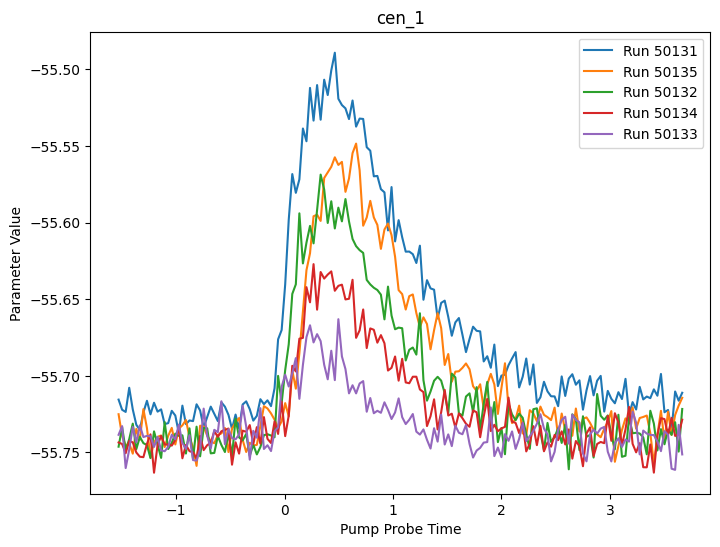

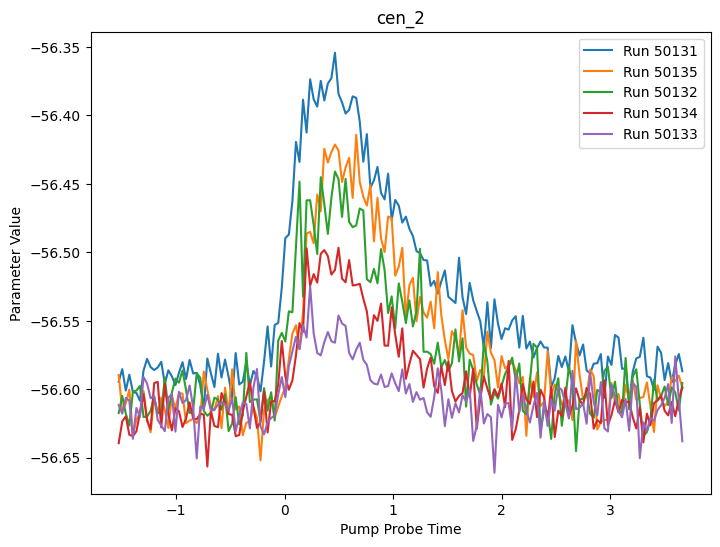

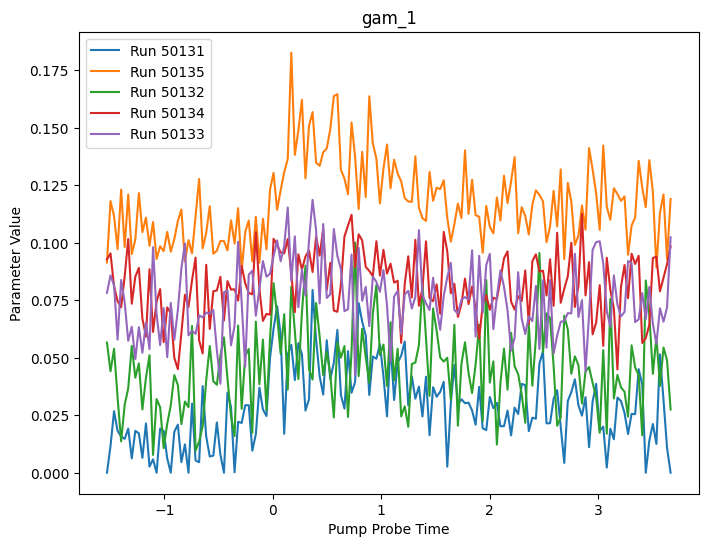

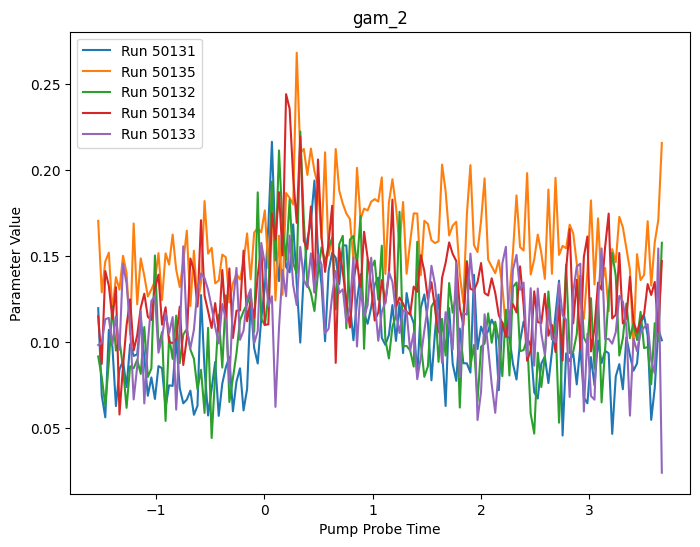

In [10]:


# Define the background function
def background(signal, A, off, **kwargs):
    model = -np.cumsum(signal)
    model -= model.min()
    return model * A + off

# Define the model function with Voigt profiles and background
def Lines(x, amp_1, amp_2, cen_1, cen_2, sig_1, sig_2, gam_1, gam_2, A, off, amp_1p, amp_2p, amp_1m, amp_2m, de, **kwargs):
    model = voigt_profile(x, amp_1, cen_1, sig_1, gam_1) + voigt_profile(x, amp_2, cen_2, sig_2, gam_2)
    sbp = voigt_profile(x, amp_1 * amp_1p, cen_1 + de, sig_1, gam_1) + voigt_profile(x, amp_2 * amp_2p, cen_2 + de, sig_2, gam_2)
    sbm = voigt_profile(x, amp_1 * amp_1m, cen_1 - de, sig_1, gam_1) + voigt_profile(x, amp_2 * amp_2m, cen_2 - de, sig_2, gam_2)
    model = model + sbp + sbm
    bg = background(model, A, off)
    return model + bg

# Define Voigt profile function
def voigt_profile(x, amplitude, center, sigma, gamma):
    z = ((x - center) + 1j * gamma) / (sigma * (2**0.5))
    return amplitude * wofz(z).real / (sigma * (2*np.pi)**0.5)

# Function to perform fitting and return results
def lineshape(run_number):
    # Ensure the correct dataset is selected
    data = xr.apply_ufunc(gaussian_filter, senorm_results[f"se_{run_number}"], (0, 0))
    
    mod = Model(Lines)
    pfit = Parameters()
    pfit.add(name='amp_1', value=3.274, min=0)
    pfit.add(name='amp_2', value=2.899, min=0)
    pfit.add(name='cen_1', value=-55.64)
    pfit.add(name='cen_2', value=-56.5)
    pfit.add(name='sig_1', value=0.205, min=0)
    pfit.add(name='sig_2', expr='sig_1')
    pfit.add(name='gam_1', value=0.09, min=0)
    pfit.add(name='gam_2', value=0.05, min=0, max=0.4)
    pfit.add(name='off', value=0.1)
    pfit.add(name='A', value=0.00158053)
    pfit.add(name='amp_1p', value=0.004, min=0)
    pfit.add(name='amp_2p', value=0.023, min=0)
    pfit.add(name='amp_1m', expr='amp_1p')
    pfit.add(name='amp_2m', expr='amp_2p')
    pfit.add(name='de', value=1.2)
    
    line = data.sel(energy=slice(-60, -52), pumpProbeTime=slice(-0.2, 0.2)).mean('pumpProbeTime')
    y = line
    x = y.energy.values
    
    print("Fitting data for run number:", run_number)
    result = mod.fit(line, params=pfit, x=x)
    Params1 = result.params
    
    guess = Parameters()
    vary = ['amp_1', 'amp_2', 'cen_1', 'cen_2', 'gam_1', 'gam_2', 'amp_1p', 'amp_2p']
    Expr = ['amp_1m', 'amp_2m']
    
    for item in Params1:
        if item in Expr:
            guess.add(item, Params1[item].value, expr=Params1[item].expr)
        else:
            guess.add(item, Params1[item].value, min=Params1[item].min, max=Params1[item].max, vary=item in vary)
    
    Fit1 = []
    for line in xr.apply_ufunc(gaussian_filter, senorm_results[f"se_{run_number}"].sel(energy=slice(-59, -52)), (0.0, 0.0)).T:
        x = line.energy.values
        result = mod.fit(line, params=guess, x=x)
        Params = result.params
        Fit1.append(Params)
    
    return Fit1


# Perform fitting and collect results
all_results = {}
for run_number in run_numbers:
    fits = lineshape(run_number)
    all_results[run_number] = fits

# Create a DataFrame for parameters
param_dict = {param: [] for param in ['run_number', 'cen_1', 'cen_2', 'gam_1', 'gam_2']}
for run_number, fits in all_results.items():
    for i, fit in enumerate(fits):
        param_dict['run_number'].append(run_number)
        param_dict['cen_1'].append(fit['cen_1'].value)
        param_dict['cen_2'].append(fit['cen_2'].value)
        param_dict['gam_1'].append(fit['gam_1'].value)
        param_dict['gam_2'].append(fit['gam_2'].value)

params_df = pd.DataFrame(param_dict)

    # Plotting parameters against pumpProbeTime for each run number
for param in ['cen_1', 'cen_2', 'gam_1', 'gam_2']:
    plt.figure(figsize=(8, 6))
    
    # Loop over run_numbers to maintain order
    for run_number in run_numbers:
        group = params_df[params_df['run_number'] == run_number]
        plt.plot(data.pumpProbeTime, group[param], label=f"Run {run_number}")

    plt.title(param)
    plt.xlabel('Pump Probe Time')
    plt.ylabel('Parameter Value')
    plt.legend(loc='best')
    plot_path = os.path.join(folder_name, f"{param}_Se3d.png")
    plt.savefig(plot_path, dpi=200)
    plt.show()

In [ ]:
import os
import matplotlib.pyplot as plt
import xarray as xr
from lmfit import Model, Parameters
from scipy.ndimage import gaussian_filter
from scipy.special import wofz
import numpy as np
import pandas as pd
from matplotlib.font_manager import FontProperties

# Ensure font settings are defined (or replace with your own settings)
font = {'family': 'serif', 'size': 14}
font_properties = FontProperties(**font)

# Perform fitting and collect results
all_results = {}
for run_number in run_numbers:
    fits = lineshape(run_number)
    all_results[run_number] = fits

# Iterate over run numbers and generate plots
for run_number in run_numbers:
    Fit1 = all_results[run_number]
    
    # Plot sideband contribution for 3/2
    plt.figure(figsize=(8, 6))
    l1 = 'Se 3d'
    l2 = '3/2'
    key = 'amp_1p'
    y = np.array([item[key].value for item in Fit1])
    plt.scatter(data.pumpProbeTime, y, s=15)
    plt.plot(data.pumpProbeTime, gaussian_filter(y, 2), label=f'{l1} {l2}')
    plt.xlabel('Delay [ps]', **font)
    plt.ylabel('sideband contribution (arb.u.)', **font)
    plt.xticks(**font)
    plt.yticks(**font)
    plt.legend(prop=font_properties)
    plt.tight_layout()
    plot_path = os.path.join(folder_name, f"{run_number}_Se3d_sideband_3_2.png")
    plt.savefig(plot_path, dpi=200)
    plt.show()

    # Plot sideband contribution for 5/2
    plt.figure(figsize=(8, 6))
    l2 = '5/2'
    key = 'amp_2p'
    y = np.array([item[key].value for item in Fit1])
    plt.scatter(data.pumpProbeTime, y, s=15)
    plt.plot(data.pumpProbeTime, gaussian_filter(y, 2), label=f'{l1} {l2}')
    plt.xlabel('Delay [ps]', **font)
    plt.ylabel('sideband contribution (arb.u.)', **font)
    plt.xticks(**font)
    plt.yticks(**font)
    plt.legend(prop=font_properties)
    plt.tight_layout()
    plot_path = os.path.join(folder_name, f"{run_number}_Se3d_sideband_5_2.png")
    plt.savefig(plot_path, dpi=200)
    plt.show()

    # Plot change in core level amplitude for 3/2
    plt.figure(figsize=(8, 6))
    l2 = '3/2'
    key = 'amp_1'
    y = np.array([item[key].value for item in Fit1])
    #y = y / y[:s].mean()
    plt.scatter(data.pumpProbeTime, y, s=15)
    plt.plot(data.pumpProbeTime, gaussian_filter(y, 2), label=f'{l1} {l2}')
    plt.xlabel('Delay [ps]', **font)
    plt.ylabel('change in core lvl amplitude', **font)
    plt.xticks(**font)
    plt.yticks(**font)
    plt.legend(prop=font_properties)
    plt.tight_layout()
    plot_path = os.path.join(folder_name, f"{run_number}_Se3d_amp_change_3_2.png")
    plt.savefig(plot_path, dpi=200)
    plt.show()

    # Plot change in core level amplitude for 5/2
    plt.figure(figsize=(8, 6))
    l2 = '5/2'
    key = 'amp_2'
    y = np.array([item[key].value for item in Fit1])
    #y = y / y[:s].mean()
    plt.scatter(data.pumpProbeTime, y, s=15)
    plt.plot(data.pumpProbeTime, gaussian_filter(y, 2), label=f'{l1} {l2}')
    plt.xlabel('Delay [ps]', **font)
    plt.ylabel('change in core lvl amplitude', **font)
    plt.xticks(**font)
    plt.yticks(**font)
    plt.legend(prop=font_properties)
    plt.tight_layout()
    plot_path = os.path.join(folder_name, f"{run_number}_Se3d_amp_change_5_2.png")
    plt.savefig(plot_path, dpi=200)
    plt.show()


# change in core level amplitude and sideband contribution

# Plot each one seperatly 

Fitting data for run number: 50131
Fitting data for run number: 50135
Fitting data for run number: 50132
Fitting data for run number: 50134
Fitting data for run number: 50133


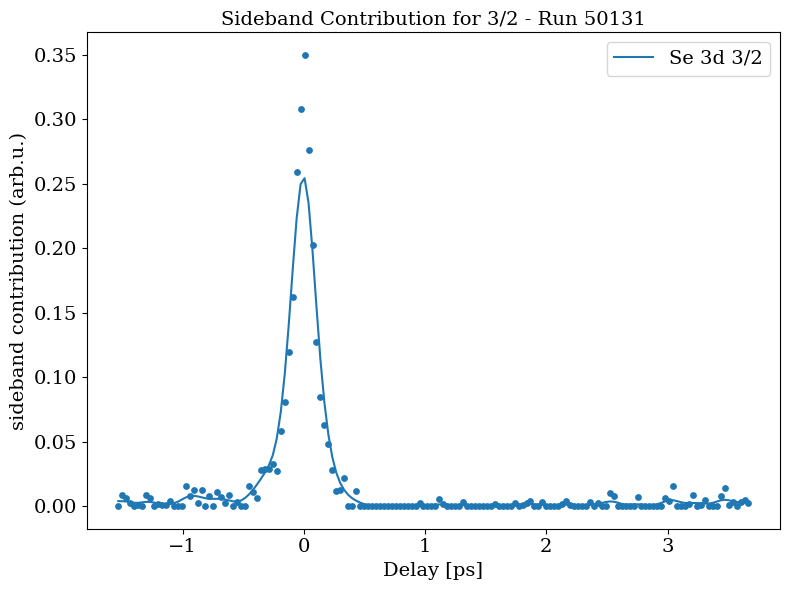

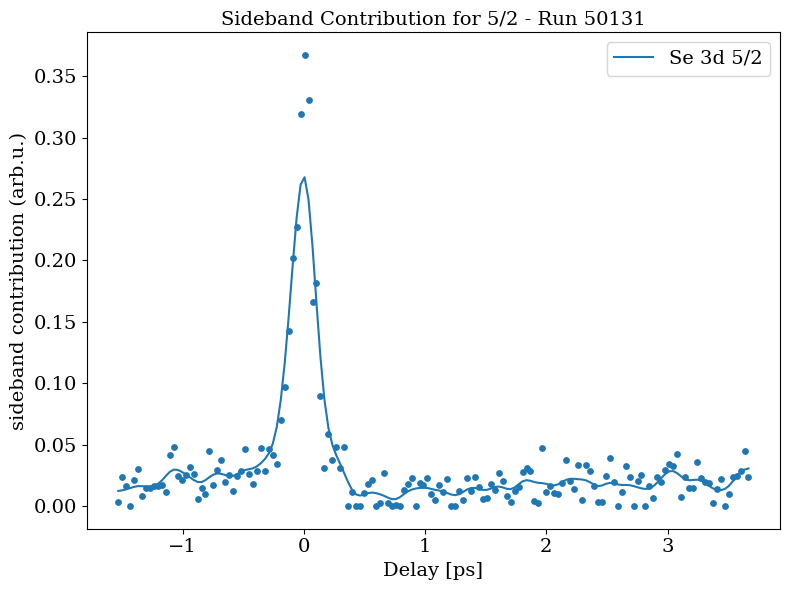

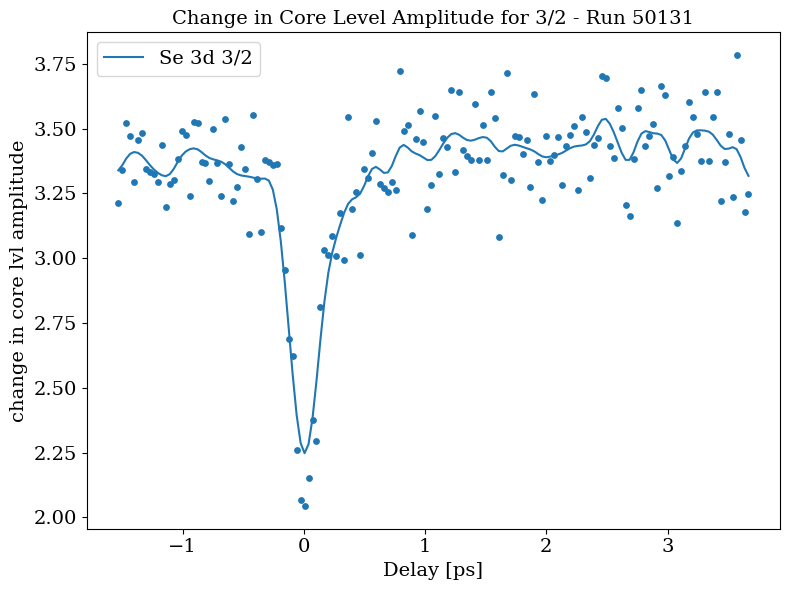

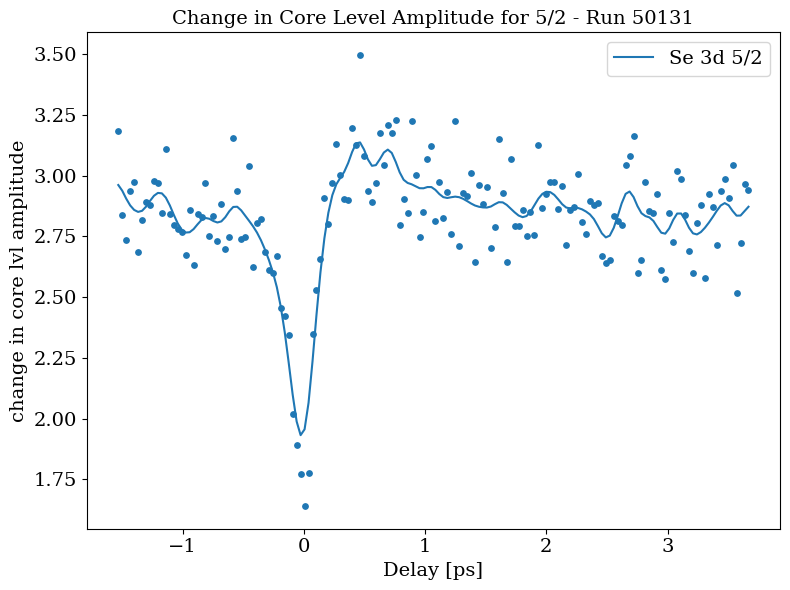

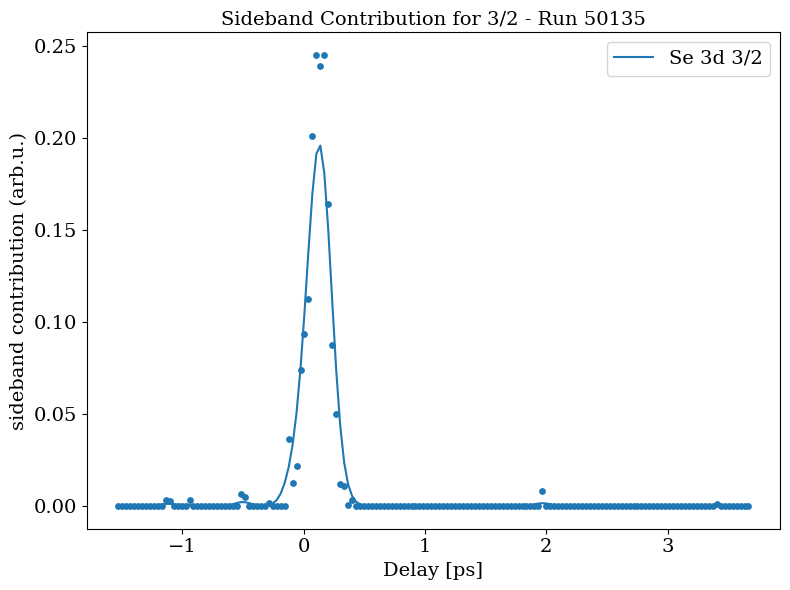

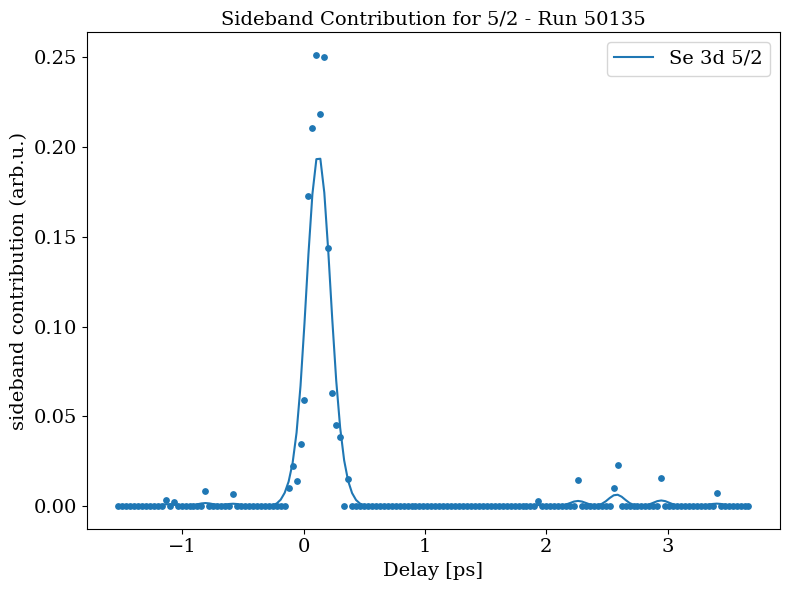

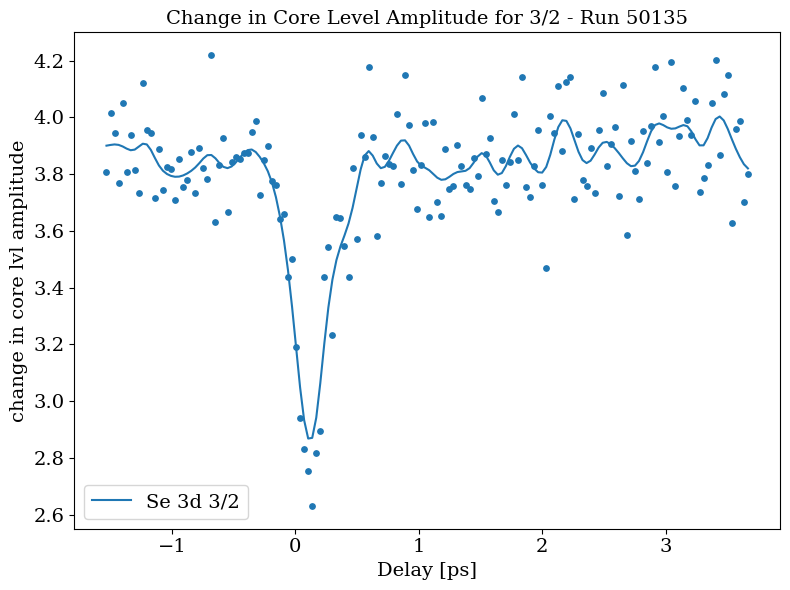

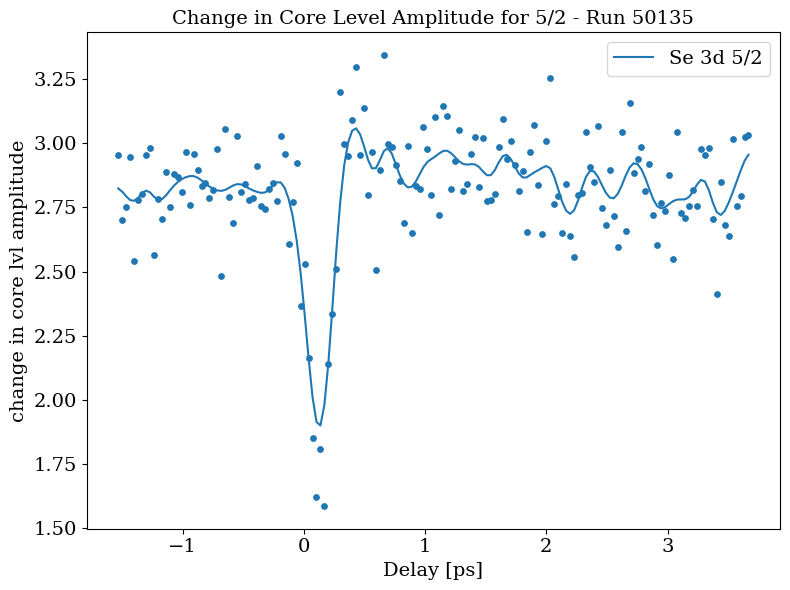

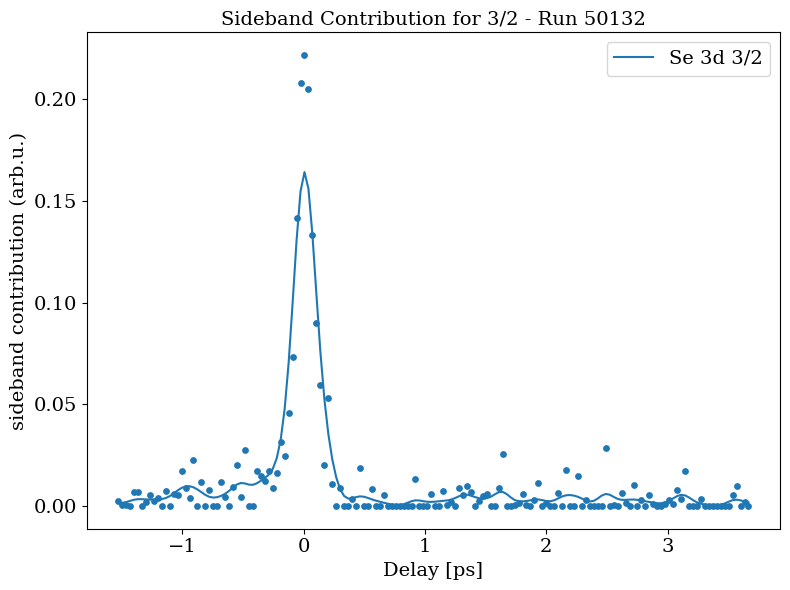

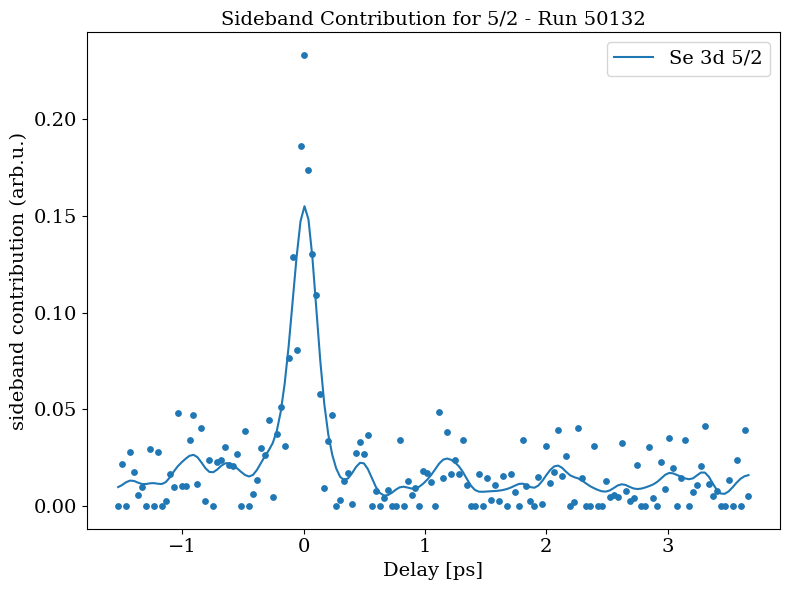

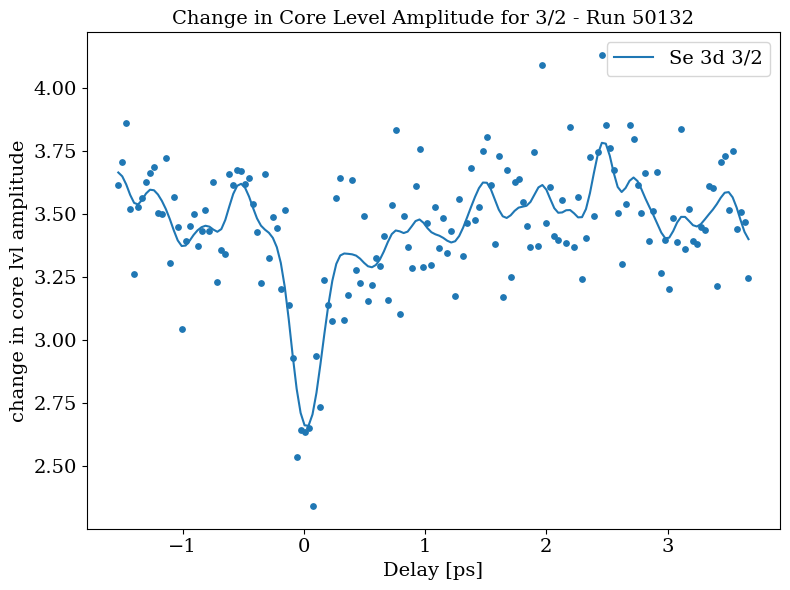

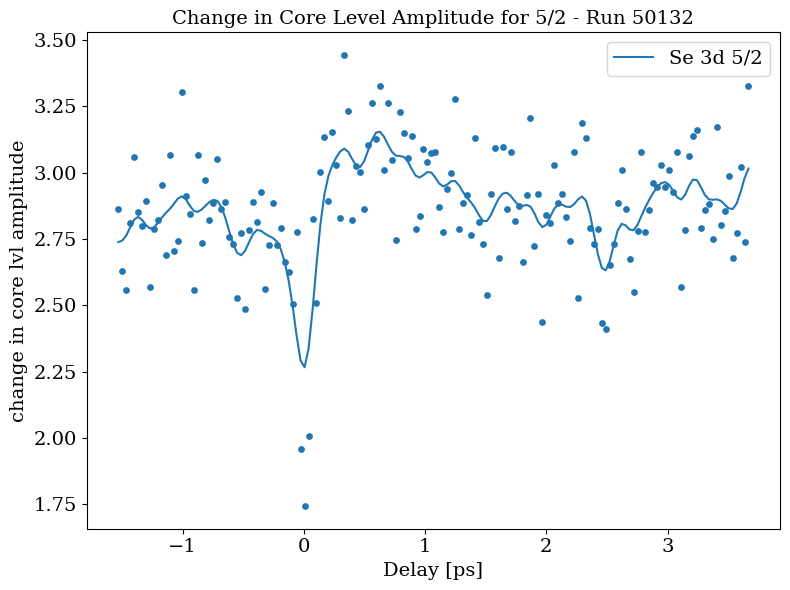

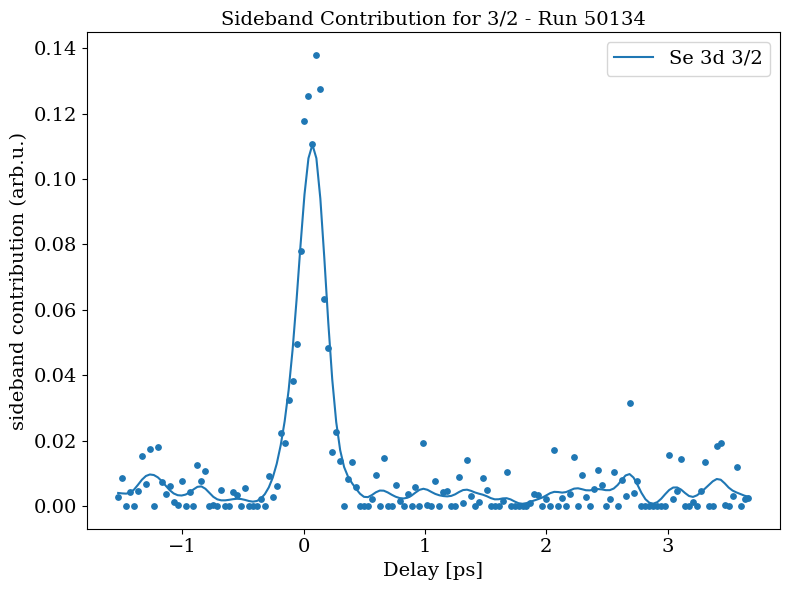

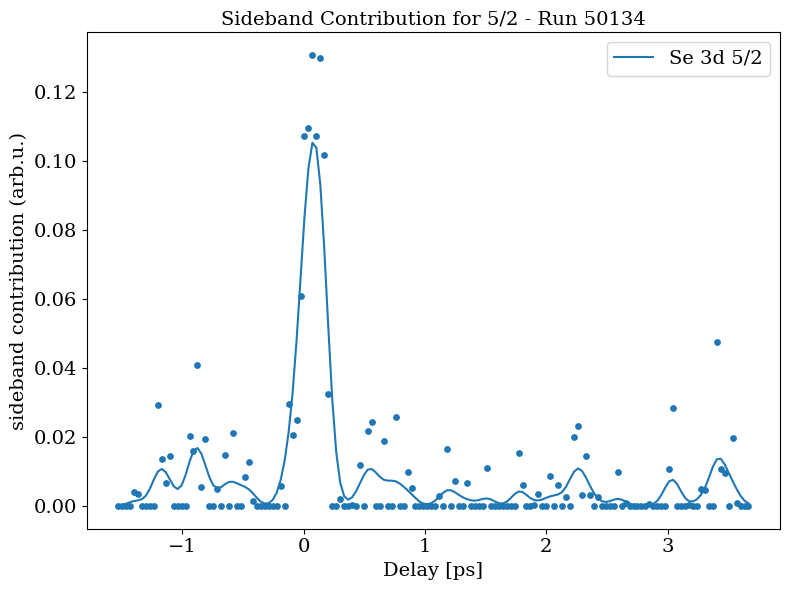

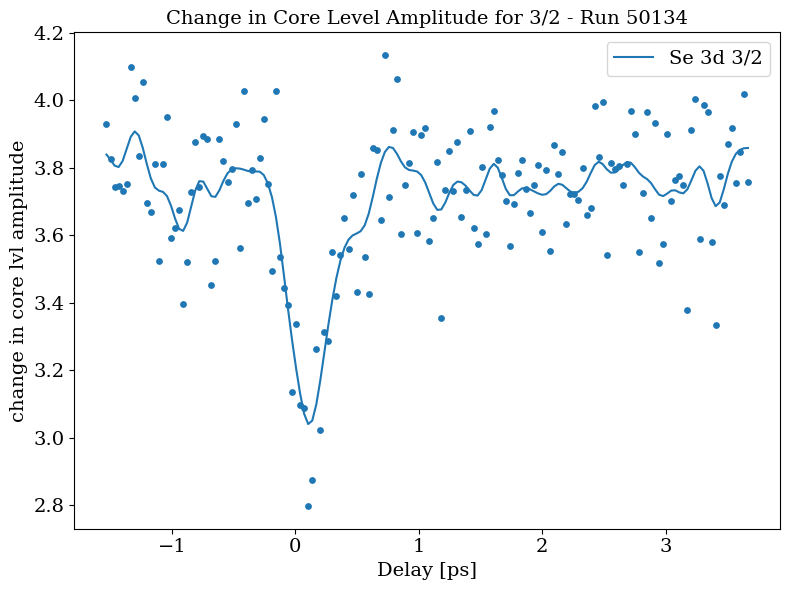

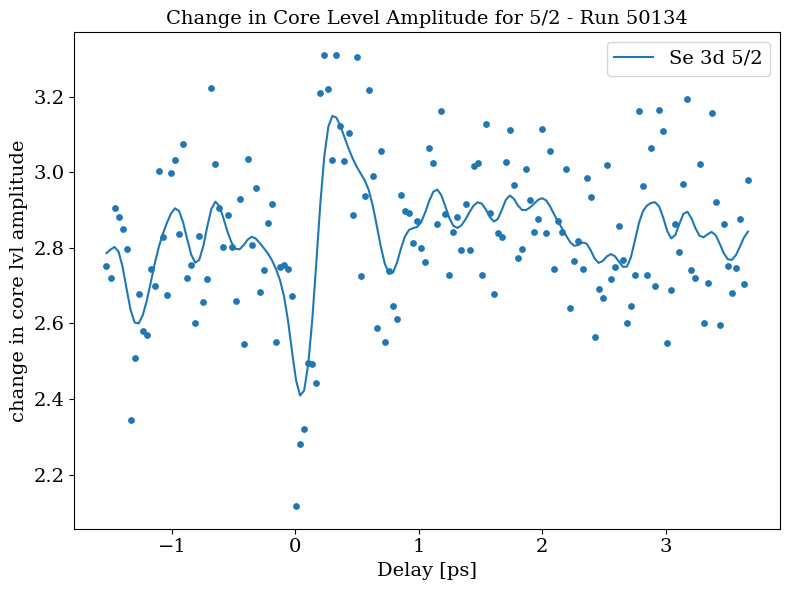

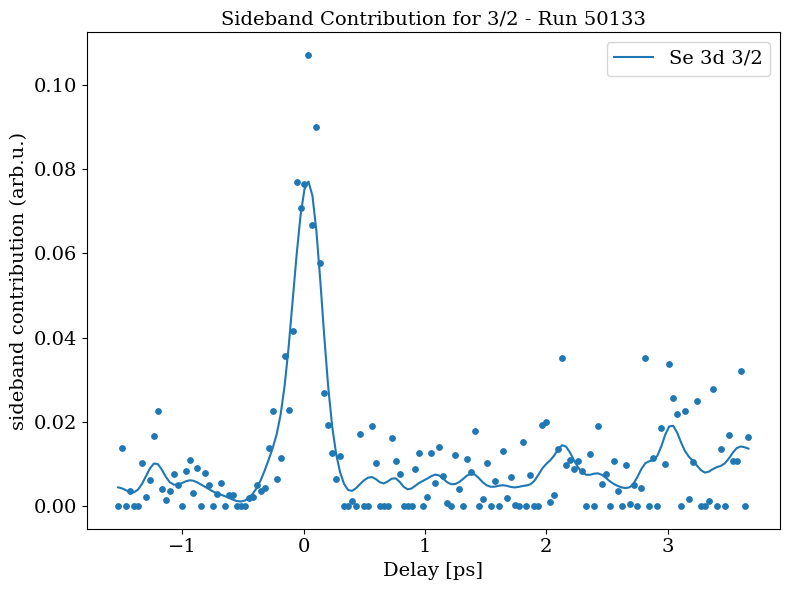

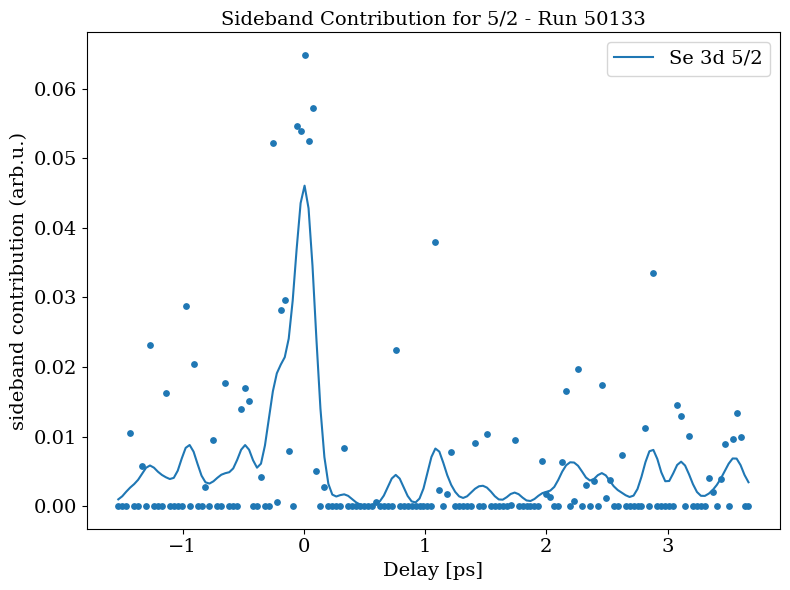

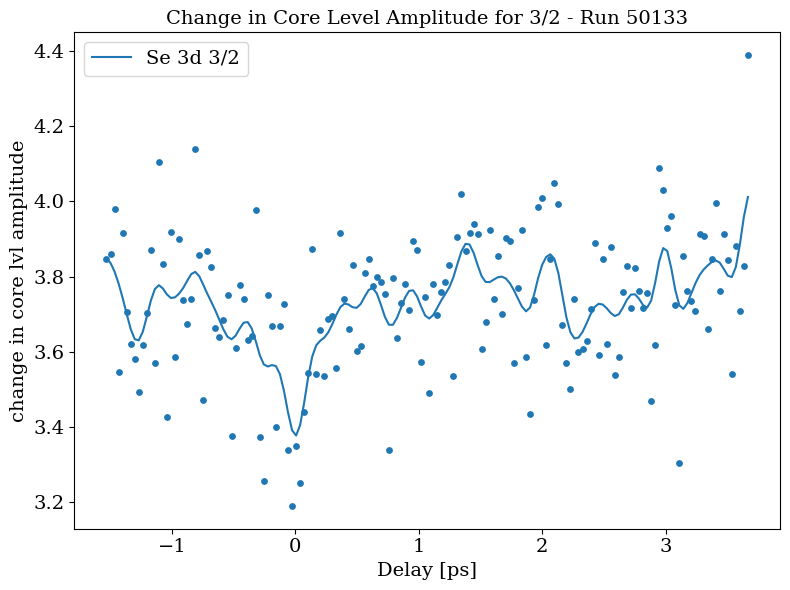

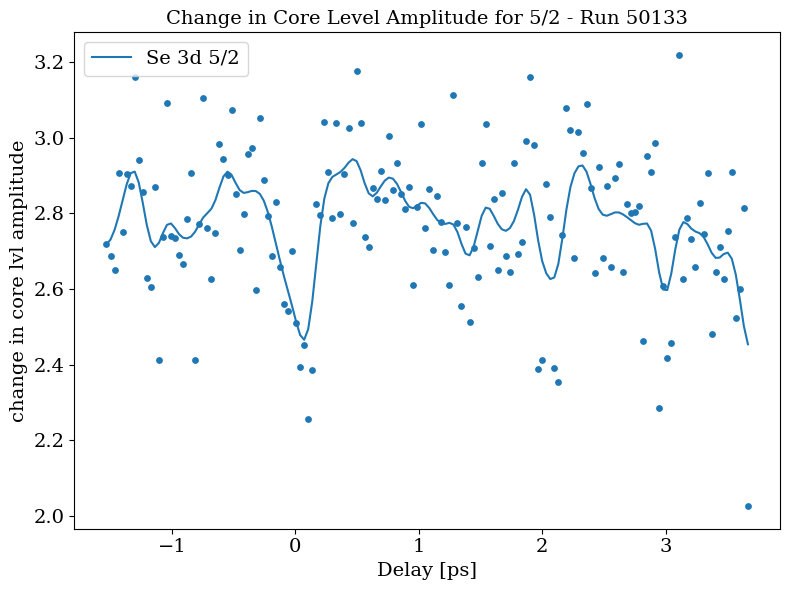

In [18]:
import os
import matplotlib.pyplot as plt
import xarray as xr
from lmfit import Model, Parameters
from scipy.ndimage import gaussian_filter
from scipy.special import wofz
import numpy as np
import pandas as pd
from matplotlib.font_manager import FontProperties

# Ensure font settings are defined (or replace with your own settings)
font = {'family': 'serif', 'size': 14}
font_properties = FontProperties(**font)

# Perform fitting and collect results
all_results = {}
for run_number in run_numbers:
    fits = lineshape(run_number)
    all_results[run_number] = fits

# Iterate over run numbers and generate plots
for run_number in run_numbers:
    Fit1 = all_results[run_number]
    
    # Plot sideband contribution for 3/2
    plt.figure(figsize=(8, 6))
    l1 = 'Se 3d'
    l2 = '3/2'
    key = 'amp_1p'
    y = np.array([item[key].value for item in Fit1])
    plt.scatter(data.pumpProbeTime, y, s=15)
    plt.plot(data.pumpProbeTime, gaussian_filter(y, 2), label=f'{l1} {l2}')
    plt.xlabel('Delay [ps]', **font)
    plt.ylabel('sideband contribution (arb.u.)', **font)
    plt.title(f'Sideband Contribution for 3/2 - Run {run_number}', **font)
    plt.xticks(**font)
    plt.yticks(**font)
    plt.legend(prop=font_properties)
    plt.tight_layout()
    plot_path = os.path.join(folder_name, f"{run_number}_Se3d_sideband_3_2.png")
    plt.savefig(plot_path, dpi=200)
    plt.show()

    # Plot sideband contribution for 5/2
    plt.figure(figsize=(8, 6))
    l2 = '5/2'
    key = 'amp_2p'
    y = np.array([item[key].value for item in Fit1])
    plt.scatter(data.pumpProbeTime, y, s=15)
    plt.plot(data.pumpProbeTime, gaussian_filter(y, 2), label=f'{l1} {l2}')
    plt.xlabel('Delay [ps]', **font)
    plt.ylabel('sideband contribution (arb.u.)', **font)
    plt.title(f'Sideband Contribution for 5/2 - Run {run_number}', **font)
    plt.xticks(**font)
    plt.yticks(**font)
    plt.legend(prop=font_properties)
    plt.tight_layout()
    plot_path = os.path.join(folder_name, f"{run_number}_Se3d_sideband_5_2.png")
    plt.savefig(plot_path, dpi=200)
    plt.show()

    # Plot change in core level amplitude for 3/2
    plt.figure(figsize=(8, 6))
    l2 = '3/2'
    key = 'amp_1'
    y = np.array([item[key].value for item in Fit1])
    #y = y / y[:s].mean()
    plt.scatter(data.pumpProbeTime, y, s=15)
    plt.plot(data.pumpProbeTime, gaussian_filter(y, 2), label=f'{l1} {l2}')
    plt.xlabel('Delay [ps]', **font)
    plt.ylabel('change in core lvl amplitude', **font)
    plt.title(f'Change in Core Level Amplitude for 3/2 - Run {run_number}', **font)
    plt.xticks(**font)
    plt.yticks(**font)
    plt.legend(prop=font_properties)
    plt.tight_layout()
    plot_path = os.path.join(folder_name, f"{run_number}_Se3d_amp_change_3_2.png")
    plt.savefig(plot_path, dpi=200)
    plt.show()

    # Plot change in core level amplitude for 5/2
    plt.figure(figsize=(8, 6))
    l2 = '5/2'
    key = 'amp_2'
    y = np.array([item[key].value for item in Fit1])
    #y = y / y[:s].mean()
    plt.scatter(data.pumpProbeTime, y, s=15)
    plt.plot(data.pumpProbeTime, gaussian_filter(y, 2), label=f'{l1} {l2}')
    plt.xlabel('Delay [ps]', **font)
    plt.ylabel('change in core lvl amplitude', **font)
    plt.title(f'Change in Core Level Amplitude for 5/2 - Run {run_number}', **font)
    plt.xticks(**font)
    plt.yticks(**font)
    plt.legend(prop=font_properties)
    plt.tight_layout()
    plot_path = os.path.join(folder_name, f"{run_number}_Se3d_amp_change_5_2.png")
    plt.savefig(plot_path, dpi=200)
    plt.show()


# Comparison

Fitting data for run number: 50131
Fitting data for run number: 50135
Fitting data for run number: 50132
Fitting data for run number: 50134
Fitting data for run number: 50133


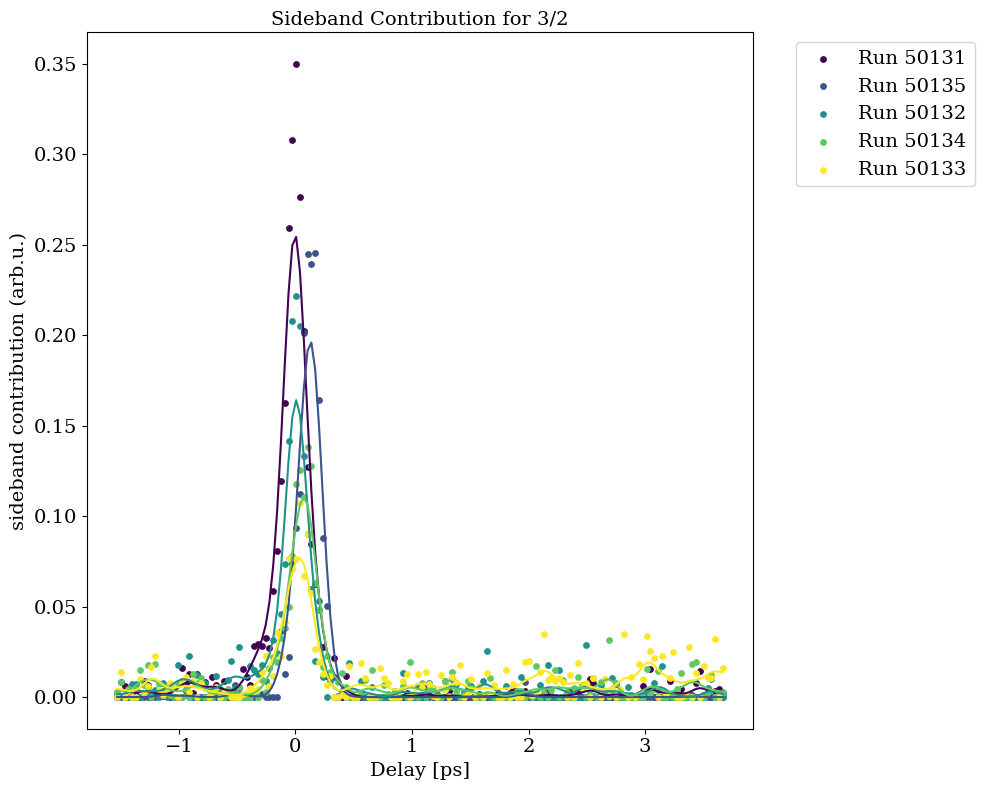

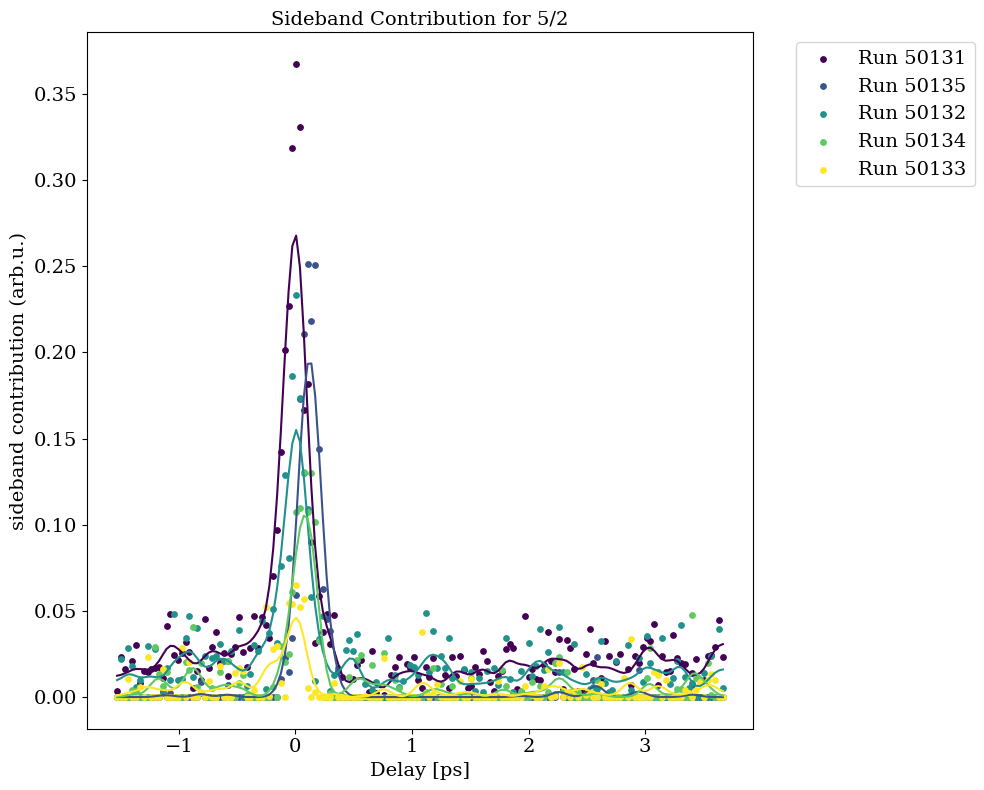

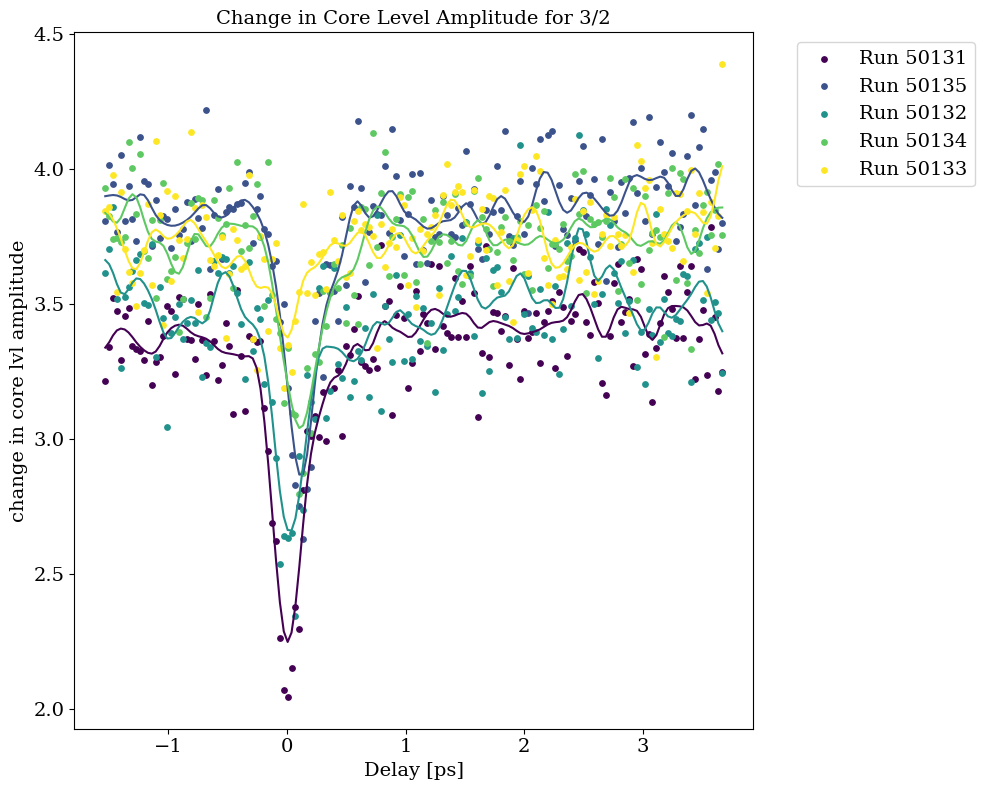

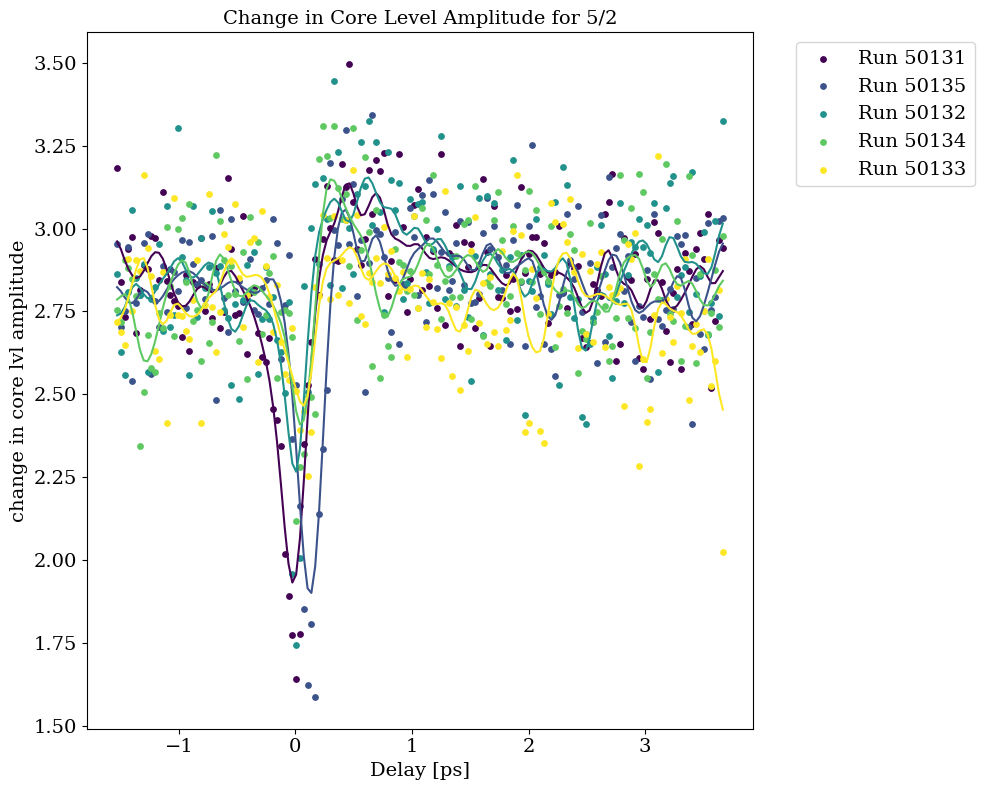

In [17]:
import os
import matplotlib.pyplot as plt
import numpy as np
from scipy.ndimage import gaussian_filter
from matplotlib.font_manager import FontProperties

# Ensure font settings are defined (or replace with your own settings)
font = {'family': 'serif', 'size': 14}
font_properties = FontProperties(**font)

# Perform fitting and collect results
all_results = {}
for run_number in run_numbers:
    fits = lineshape(run_number)
    all_results[run_number] = fits

# Colors for different run numbers
colors = plt.cm.viridis(np.linspace(0, 1, len(run_numbers)))

# Combined plot for 3/2 sideband contribution
plt.figure(figsize=(10, 8))
for run_number, color in zip(run_numbers, colors):
    Fit1 = all_results[run_number]
    l1 = 'Se 3d'
    l2 = '3/2'
    key = 'amp_1p'
    y = np.array([item[key].value for item in Fit1])
    plt.scatter(data.pumpProbeTime, y, s=15, color=color, label=f'Run {run_number}')
    plt.plot(data.pumpProbeTime, gaussian_filter(y, 2), color=color)
plt.xlabel('Delay [ps]', **font)
plt.ylabel('sideband contribution (arb.u.)', **font)
plt.title('Sideband Contribution for 3/2', **font)
plt.xticks(**font)
plt.yticks(**font)
plt.legend(prop=font_properties, bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plot_path = os.path.join(folder_name, "Se3d_sideband_3_2_combined.png")
plt.savefig(plot_path, dpi=200)
plt.show()

# Combined plot for 5/2 sideband contribution
plt.figure(figsize=(10, 8))
for run_number, color in zip(run_numbers, colors):
    Fit1 = all_results[run_number]
    l1 = 'Se 3d'
    l2 = '5/2'
    key = 'amp_2p'
    y = np.array([item[key].value for item in Fit1])
    plt.scatter(data.pumpProbeTime, y, s=15, color=color, label=f'Run {run_number}')
    plt.plot(data.pumpProbeTime, gaussian_filter(y, 2), color=color)
plt.xlabel('Delay [ps]', **font)
plt.ylabel('sideband contribution (arb.u.)', **font)
plt.title('Sideband Contribution for 5/2', **font)
plt.xticks(**font)
plt.yticks(**font)
plt.legend(prop=font_properties, bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plot_path = os.path.join(folder_name, "Se3d_sideband_5_2_combined.png")
plt.savefig(plot_path, dpi=200)
plt.show()

# Combined plot for 3/2 change in core level amplitude
plt.figure(figsize=(10, 8))
for run_number, color in zip(run_numbers, colors):
    Fit1 = all_results[run_number]
    l1 = 'Se 3d'
    l2 = '3/2'
    key = 'amp_1'
    y = np.array([item[key].value for item in Fit1])
    # y = y / y[:s].mean()
    plt.scatter(data.pumpProbeTime, y, s=15, color=color, label=f'Run {run_number}')
    plt.plot(data.pumpProbeTime, gaussian_filter(y, 2), color=color)
plt.xlabel('Delay [ps]', **font)
plt.ylabel('change in core lvl amplitude', **font)
plt.title('Change in Core Level Amplitude for 3/2', **font)
plt.xticks(**font)
plt.yticks(**font)
plt.legend(prop=font_properties, bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plot_path = os.path.join(folder_name, "Se3d_amp_change_3_2_combined.png")
plt.savefig(plot_path, dpi=200)
plt.show()

# Combined plot for 5/2 change in core level amplitude
plt.figure(figsize=(10, 8))
for run_number, color in zip(run_numbers, colors):
    Fit1 = all_results[run_number]
    l1 = 'Se 3d'
    l2 = '5/2'
    key = 'amp_2'
    y = np.array([item[key].value for item in Fit1])
    # y = y / y[:s].mean()
    plt.scatter(data.pumpProbeTime, y, s=15, color=color, label=f'Run {run_number}')
    plt.plot(data.pumpProbeTime, gaussian_filter(y, 2), color=color)
plt.xlabel('Delay [ps]', **font)
plt.ylabel('change in core lvl amplitude', **font)
plt.title('Change in Core Level Amplitude for 5/2', **font)
plt.xticks(**font)
plt.yticks(**font)
plt.legend(prop=font_properties, bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plot_path = os.path.join(folder_name, "Se3d_amp_change_5_2_combined.png")
plt.savefig(plot_path, dpi=200)
plt.show()
